<a href="https://colab.research.google.com/github/smoralesc91/DataScience2024/blob/main/T1_mod_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import os
import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib.ticker import StrMethodFormatter
from matplotlib import __version__ as mpl_version

from scipy import __version__ as sp_version
import scipy.stats as stats
import scipy.stats
from scipy.stats import norm
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import seaborn as sns

import tkinter as tk
from tkinter.filedialog import askopenfile

from sklearn.metrics import r2_score
from sklearn import __version__ as skl_version

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', mpl_version)
print('seaborn version:', sns.__version__)
print('scipy version:', sp_version)
print('sklearn version:', skl_version)

pandas version: 1.5.3
numpy version: 1.25.2
matplotlib version: 3.7.1
seaborn version: 0.13.1
scipy version: 1.11.4
sklearn version: 1.2.2


# Base de datos: Registros Geofísicos

In [38]:
url = 'https://raw.githubusercontent.com/smoralesc91/DataScience2024/main/Data/well_data_rev1.csv'
data_all = pd.read_csv(url)
data = data_all[['CALI', 'GR', 'ILD', 'PEF', 'RHOB', 'NPHI']].copy()

def log_transform(data):
  log_data = np.log10(data)
  return log_data

data.loc[:, 'logILD'] = log_transform(data['ILD'])

data_wlogILD = data[['CALI', 'GR', 'logILD', 'PEF', 'RHOB', 'NPHI']]

data_units_all= np.array(['ft', 'in', 'API', 'ohm.m', 'b/e', 'g/cc', 'p.u.', 'adim'])
data_units= np.array(['in', 'API', 'ohm.m', 'b/e', 'g/cc', 'p.u.'])

print(data_units_all)
print('-----------------------------------------------------------')
print(data_all.head(5))
print('-----------------------------------------------------------')
print(data_units)
print('-----------------------------------------------------------')
print(data.head(5))
print('-----------------------------------------------------------')
print(data_wlogILD.head(5))

['ft' 'in' 'API' 'ohm.m' 'b/e' 'g/cc' 'p.u.' 'adim']
-----------------------------------------------------------
    DEPTH  CALI   GR  ILD  PEF   RHOB   NPHI  SHALE
0  5000.0   8.8  125  2.6  2.6  2.199  0.403      1
1  5000.5   8.8  129  2.5  2.7  2.209  0.373      1
2  5001.0   8.8  133  2.6  2.9  2.232  0.378      1
3  5001.5   8.8  142  2.8  3.1  2.268  0.386      1
4  5002.0   8.7  147  3.1  2.9  2.295  0.375      1
-----------------------------------------------------------
['in' 'API' 'ohm.m' 'b/e' 'g/cc' 'p.u.']
-----------------------------------------------------------
   CALI   GR  ILD  PEF   RHOB   NPHI    logILD
0   8.8  125  2.6  2.6  2.199  0.403  0.414973
1   8.8  129  2.5  2.7  2.209  0.373  0.397940
2   8.8  133  2.6  2.9  2.232  0.378  0.414973
3   8.8  142  2.8  3.1  2.268  0.386  0.447158
4   8.7  147  3.1  2.9  2.295  0.375  0.491362
-----------------------------------------------------------
   CALI   GR    logILD  PEF   RHOB   NPHI
0   8.8  125  0.414973  2.6  2

In [41]:
print(data_all.describe())
print('-----------------------------------------------------------')
print(data.describe())
print('-----------------------------------------------------------')
print(data_wlogILD.describe())

             DEPTH         CALI           GR          ILD          PEF  \
count  1201.000000  1201.000000  1201.000000  1201.000000  1201.000000   
mean   5300.000000     8.644130    76.518734    25.347377     3.320733   
std     173.421572     1.154275    38.601229    40.978320     0.711321   
min    5000.000000     7.300000    15.000000     2.300000     1.800000   
25%    5150.000000     7.500000    31.000000     3.600000     2.900000   
50%    5300.000000     8.500000    97.000000     4.800000     3.200000   
75%    5450.000000     9.500000   108.000000    19.500000     3.700000   
max    5600.000000    12.200000   153.000000   165.400000     5.300000   

              RHOB         NPHI        SHALE  
count  1201.000000  1201.000000  1201.000000  
mean      2.550055     0.195087     0.562864  
std       0.115164     0.131611     0.496239  
min       1.891000     0.006000     0.000000  
25%       2.475000     0.056000     0.000000  
50%       2.568000     0.257000     1.000000  
75% 

# Funciones


## Estadigrafos

In [12]:
def estadistica_basica(info, log_trans = False):

  if log_trans == True:
    info = np.log10(info)
  else:
    info

  n=len(info)
  minimo=np.min(info)
  q1=np.percentile(info,25)
  mediana=np.percentile(info,50)
  media=np.mean(info)
  q3=np.percentile(info,75)
  maximo=np.max(info)
  rango=maximo-minimo
  iqr=q3-q1
  varianza=info.var()
  desviacion_estandar=np.std(info)
  coef_var = desviacion_estandar/media
  skewness=np.mean((info-media)**3)/(desviacion_estandar**3)
  k=np.mean(((info-media)/desviacion_estandar)**4)

  eb=n,minimo,q1,mediana,media,q3,maximo,rango, iqr,varianza,desviacion_estandar,coef_var,skewness, k

  etiquetas = ['No. muestras', 'Mínimo', 'Q1', 'Mediana', 'Media', 'Q3', 'Máximo', 'Rango', 'IQR', 'Varianza', 'Desviacion estándar', 'Coeficiente de variación','Simetría', 'Curtosis']

  estadistica_calculada = pd.DataFrame({'Estadígrafo': etiquetas, 'Valor Numérico': eb})
  estadistica_calculada['Valor Numérico'] = estadistica_calculada['Valor Numérico'].map('{:.2f}'.format)

  return estadistica_calculada

## Análsis bivariado

In [13]:
def plotxy(dx, dy, log_x=False, log_y=False):
    # Crear una figura con 1 fila y 4 columnas
    #column_headers = data.columns.tolist()
    #y_column = column_headers[1]  # Porosity
    #x_column = column_headers[0]  # Depth

    # Datos para la gráfica
    #x_data = data[x_column]
    #y_data = data[y_column]

    fig = plt.figure(figsize=(10, 10))

    # Tamaño y ubicación de los subplots utilizando subplot2grid
    ax_disp = plt.subplot2grid((7, 7), (3, 0), colspan=4, rowspan=4)
    ax_info = plt.subplot2grid((7, 7), (0, 4), colspan=3, rowspan=3)
    ax_hist_v1 = plt.subplot2grid((7, 7), (0, 0), colspan=4, rowspan=2)
    ax_box_cadmio = plt.subplot2grid((7, 7), (2, 0), colspan=4)
    ax_hist_v2 = plt.subplot2grid((7, 7), (3, 5), colspan=2, rowspan=4)
    ax_box_plomo = plt.subplot2grid((7, 7), (3, 4), rowspan=4)

    # Graficar el gráfico de dispersión
    ax_disp.scatter(dx, dy)
    #ax_disp.set(xlabel=ax_box_cadmio.set_title(''), ylabel=ax_box_plomo.set_title(''))

    # Ajustar una línea de regresión lineal en la gráfica de dispersión
    m, b = np.polyfit(dx, dy, 1)
    ax_disp.plot(dx, m * dx + b, color='red', label='Tendecy line')

    # Agregar la ecuación de la línea de regresión en el gráfico
    equation_text = f' y = {m:.2f}x + {b:.2f}'
    plt.text(0.05, 0.9, equation_text, transform=ax_disp.transAxes, fontsize=12, color='red')

    # Graficas el histograma del cadmio en la parte superior
    datos1 = dx
    n1 = len(datos1)
    k1 = 1 + int(np.log2(n1))

    ax_hist_v1.hist(datos1, bins=k1, orientation='vertical', color='skyblue', edgecolor='black', log=log_x)
    ax_hist_v1.set(ylabel='Frecuency')

    # Eliminar las marcas de los ejes x e y en ax_info
    ax_info.set_xticks([])
    ax_info.set_yticks([])

    # Calcular la media y la mediana
    media = np.mean(datos1)
    mediana = np.median(datos1)

    # Agregar líneas verticales para la media y la mediana en el subplot de distribución
    ax_hist_v1.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {media:.2f}')
    ax_hist_v1.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Median: {mediana:.2f}')
    ax_hist_v1.legend()

    # Graficar el boxplot horizontal del cadmio en la parte superior
    sns.boxplot(x=dx, ax=ax_box_cadmio, orient='h', width=0.1)

    ax_box_cadmio.set(xticklabels=[], yticklabels=[])
    ax_box_cadmio.set_title('')


    # Graficar el histograma del plomo en la parte lateral derecha
    datos = dy
    n = len(datos)
    k = 1 + int(np.log2(n))

    ax_hist_v2.hist(datos, bins=k, orientation='horizontal', color='skyblue', edgecolor='black', log=log_y)
    ax_hist_v2.set(xlabel='Frecuency')

    # Calcular la media y la mediana
    media = np.mean(datos)
    mediana = np.median(datos)

    # Agregar líneas verticales para la media y la mediana en el subplot de distribución
    ax_hist_v2.axhline(media, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {media:.2f}')
    ax_hist_v2.axhline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Median: {mediana:.2f}')
    ax_hist_v2.legend()

    # Graficar el boxplot vertical del plomo en la parte lateral derecha
    sns.boxplot(y=dy, ax=ax_box_plomo, orient='v', width=0.1)
    ax_box_plomo.set(xticklabels=[], yticklabels=[])
    ax_box_plomo.set_title('')

    # Agregar texto al gráfico
    p = dx.corr(dy)
    s = dx.corr(dy, method='spearman')
    k = dx.corr(dy, method='kendall')

    # Coeficiente de correlación R^2
    m, b = np.polyfit(dx, dy, 1)
    y_pred = m * dx + b
    r2 = r2_score(dy, y_pred)

    ax_info.text(0.2, 0.9, f'Pearson: {p:.2f}', fontsize=12, color='black')
    ax_info.text(0.2, 0.8, f'Spearman: {s:.2f}', fontsize=12, color='black')
    ax_info.text(0.2, 0.7, f'Kendall: {k:.2f}', fontsize=12, color='black')
    ax_info.text(0.2, 0.6, f'$R^2$: {r2:.2f}', fontsize=12, color='black')

    # Ajustar la posición de los subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.6)  # Espacio entre los subplots

    # Mostrar el gráfico
    #plt.show()

## QQ-plot, PP-plot, CDF

In [14]:
def regresion_lineal(dx,dy):
  m, b = np.polyfit(dx, dy, 1)
  y_pred = m * dx + b
  alma=dy-y_pred
  #alma= pd.DataFrame(dy-y_pred)
  return alma

def crear_graficos_estadisticos(datos):

    # Crear una figura con 1 fila y 4 columnas
    fig = plt.figure(figsize=(10, 10))

    # Tamaño y ubicación de los subplots utilizando subplot2grid
    ax_hist = plt.subplot2grid((8, 8), (0, 0), colspan=4, rowspan=4)
    ax_cdf = plt.subplot2grid((8, 8), (4, 0), colspan=4, rowspan=4)
    ax_qq = plt.subplot2grid((8, 8), (0, 4), colspan=4, rowspan=4)
    ax_pp = plt.subplot2grid((8, 8), (4, 4), colspan=4, rowspan=4)

    # Histograma de residuos
    n1 = len(datos)
    k1 = 1 + int(np.log2(n1))

    ax_hist.hist(datos, bins=k1, orientation='vertical', color='skyblue', edgecolor='black')
    ax_hist.set(ylabel='Frecuencia')
    ax_hist.set(title='Histograma')

    # Calcular la media y la mediana
    media = np.mean(datos)
    mediana = np.median(datos)

    # Agregar líneas verticales para la media y la mediana en el subplot de distribución
    ax_hist.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
    ax_hist.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax_hist.legend()

    # QQ plot
    media_ajustada, desviacion_ajustada = stats.norm.fit(datos)
    cuantiles_teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, 155), loc=media_ajustada, scale=desviacion_ajustada)
    datos_ordenados = np.sort(datos)
    m, b = np.polyfit(cuantiles_teoricos, datos_ordenados, 1)

    ax_qq.scatter(cuantiles_teoricos, datos_ordenados, alpha=0.7)
    ax_qq.plot(cuantiles_teoricos, m * cuantiles_teoricos + b, color='red', label='Línea de Tendencia')
    ax_qq.set(ylabel='Cuantiles observados', xlabel='Cuantiles teóricos')
    ax_qq.set(title='Q-Q Plot')

    # CDF
    datos_ordenados = np.sort(datos)
    cdf_empirica = np.arange(1, len(datos_ordenados) + 1) / len(datos_ordenados)

    media, desviacion = norm.fit(datos)
    x = np.linspace(-200, 700, 1000)
    cdf_teorica = norm.cdf(x, loc=media, scale=desviacion)

    ax_cdf.plot(datos_ordenados, cdf_empirica, marker='o', linestyle='-', label='CDF Empírica')
    ax_cdf.plot(x, cdf_teorica, linestyle='--', color='red', label='CDF Teórica (Normal)')
    ax_cdf.set(ylabel='Cuantiles Observados', xlabel='Probabilidad Acumulada Teórica Normalizada', title='CDF Empírica vs. CDF Teórica')

    # PP plot
    datos_ordenados = np.sort(datos)
    cdf_empirica = np.arange(1, len(datos_ordenados) + 1) / len(datos_ordenados)
    media, desviacion = norm.fit(datos)
    x = np.linspace(min(datos), max(datos), 155)
    cdf_teorica = norm.cdf(x, loc=media, scale=desviacion)

    ax_pp.plot(cdf_teorica, cdf_empirica, marker='o', linestyle='', label='CDF Empírica vs. CDF Teórica')
    ax_pp.plot([0, 1], [0, 1], linestyle='--', color='red', label='Línea de Referencia (Igualdad)')
    ax_pp.set(ylabel='Probabilidad empírica', xlabel='Probabilidad teórica', title='PP plot')

    # Ajustar la posición de los subplots
    plt.subplots_adjust(wspace=2, hspace=2)  # Espacio entre los subplots

    # Mostrar el gráfico
    plt.show()


## Histograma y box plot

In [15]:
def plot_boxplot_histogram(data, log_trans = False, log=False):

    if log_trans == True:
      data = np.log10(data)
    else:
      data

    mean_val = data.mean()
    median_val = data.median()

    n1 = len(data)
    k1 = 1 + int(np.log2(n1))

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7, 4), gridspec_kw={"height_ratios": (1, 8)})

    sns.boxplot(data, orient='h', ax=ax_box)

    sns.histplot(data, ax=ax_hist, bins=k1, cumulative=False, log_scale=log)

    ax_box.axvline(x=mean_val, color='r', linestyle='--', label='Media')
    ax_box.axvline(x=median_val, color='g', linestyle='--', label='Mediana')
    ax_hist.axvline(x=mean_val, color='r', linestyle='--', label='Media')
    ax_hist.axvline(x=median_val, color='g', linestyle='--', label='Mediana')

    ax_hist.set_ylabel('Frecuencia', fontsize=14)

    if log_trans == True:
      ax_hist.set_xlabel('log' + data.name, fontsize=14)
    else:
      ax_hist.set_xlabel(data.name, fontsize=14)

    plt.tight_layout()

    ax_hist.legend()

    #plt.show()

## Transformacion logaritmica

In [16]:
def log_transform(data):
  log_data = np.log10(data)
  return log_data

## Correlaciones Kendall, Spearman, Pearson

In [17]:
def kendall_corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = kendalltau(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    ax.annotate(f"{r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=45, ha='center', va='center')

In [18]:
def spearman_corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = spearmanr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    ax.annotate(f"{r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=45, ha='center', va='center')

In [19]:
def pearson_corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3]) ) / 2
    ax.annotate(f"{r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=45, ha='center', va='center')

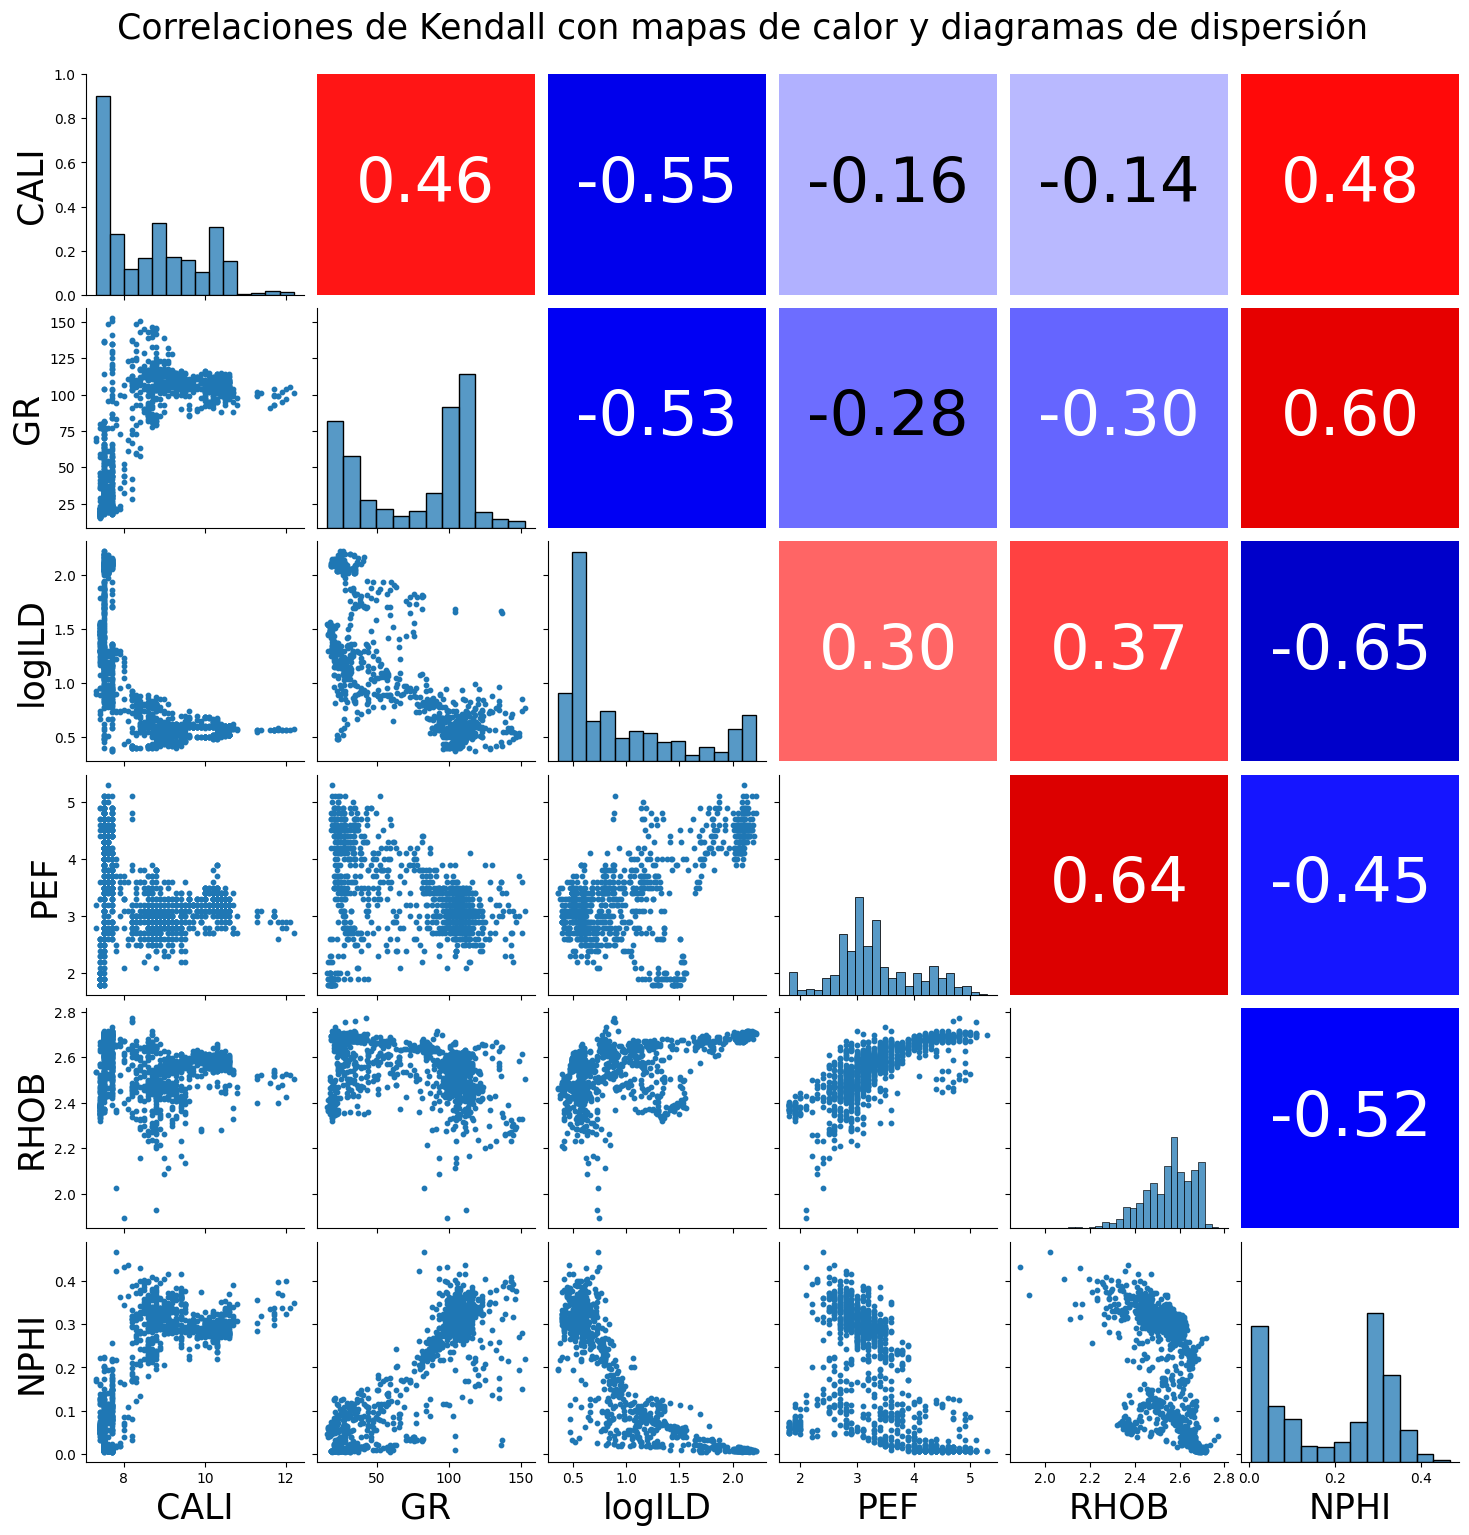

In [48]:
d1 = data_wlogILD
mpl.rcParams["axes.labelsize"] = 25
mpl.rcParams["figure.facecolor"] = "w"
g = sns.PairGrid(d1)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=False)
g.map_upper(kendall_corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-1, vmax=1))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
g.fig.suptitle('Correlaciones de Kendall con mapas de calor y diagramas de dispersión',size=25, y=1.025)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Matriz_correlacion/heatmap_kendall.png', dpi=600, bbox_inches="tight")
plt.show()

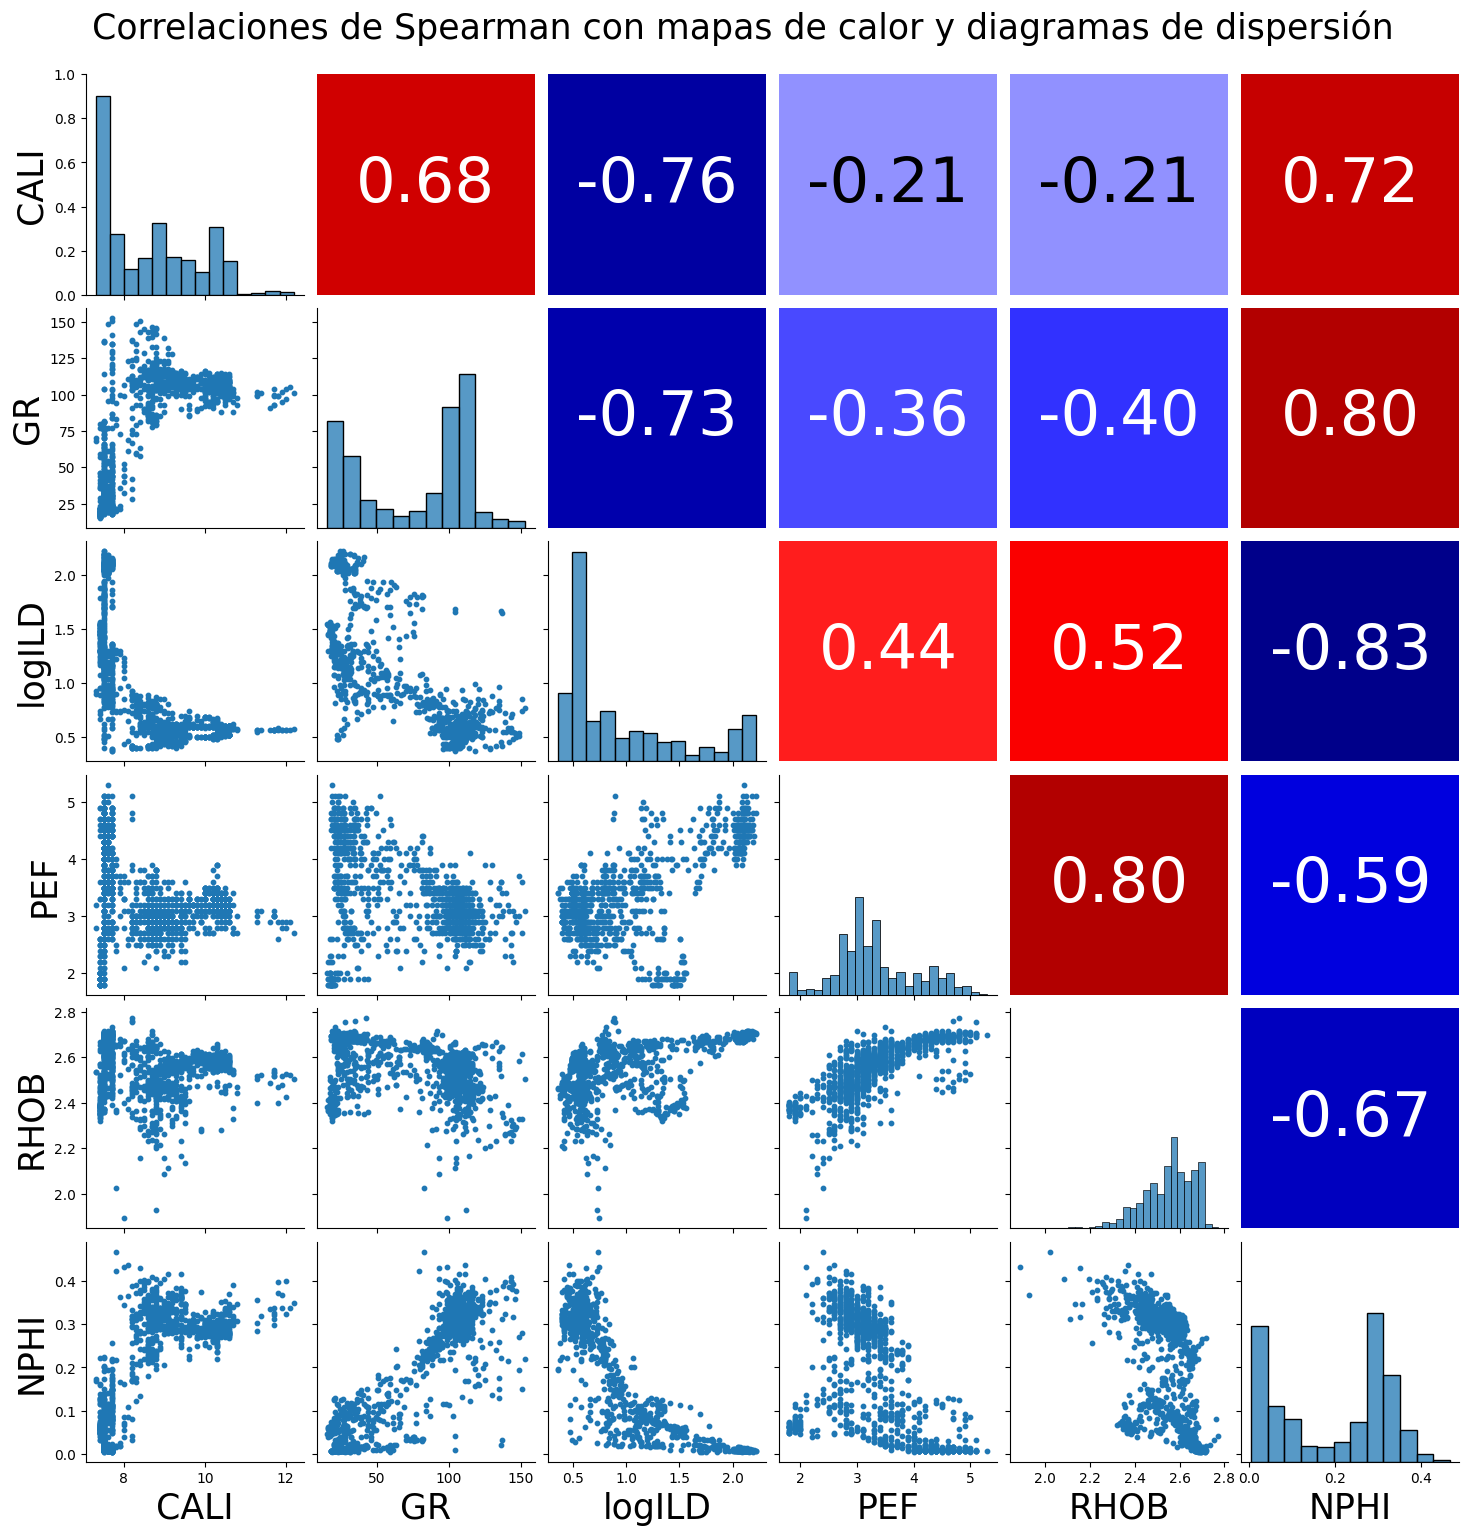

In [53]:
d1 = data_wlogILD
mpl.rcParams["axes.labelsize"] = 25
mpl.rcParams["figure.facecolor"] = "w"
g = sns.PairGrid(d1)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=False)
g.map_upper(spearman_corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-1, vmax=1))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
g.fig.suptitle('Correlaciones de Spearman con mapas de calor y diagramas de dispersión',size=25, y=1.025)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Matriz_correlacion/heatmap_spearman.png', dpi=600, bbox_inches="tight")
plt.show()

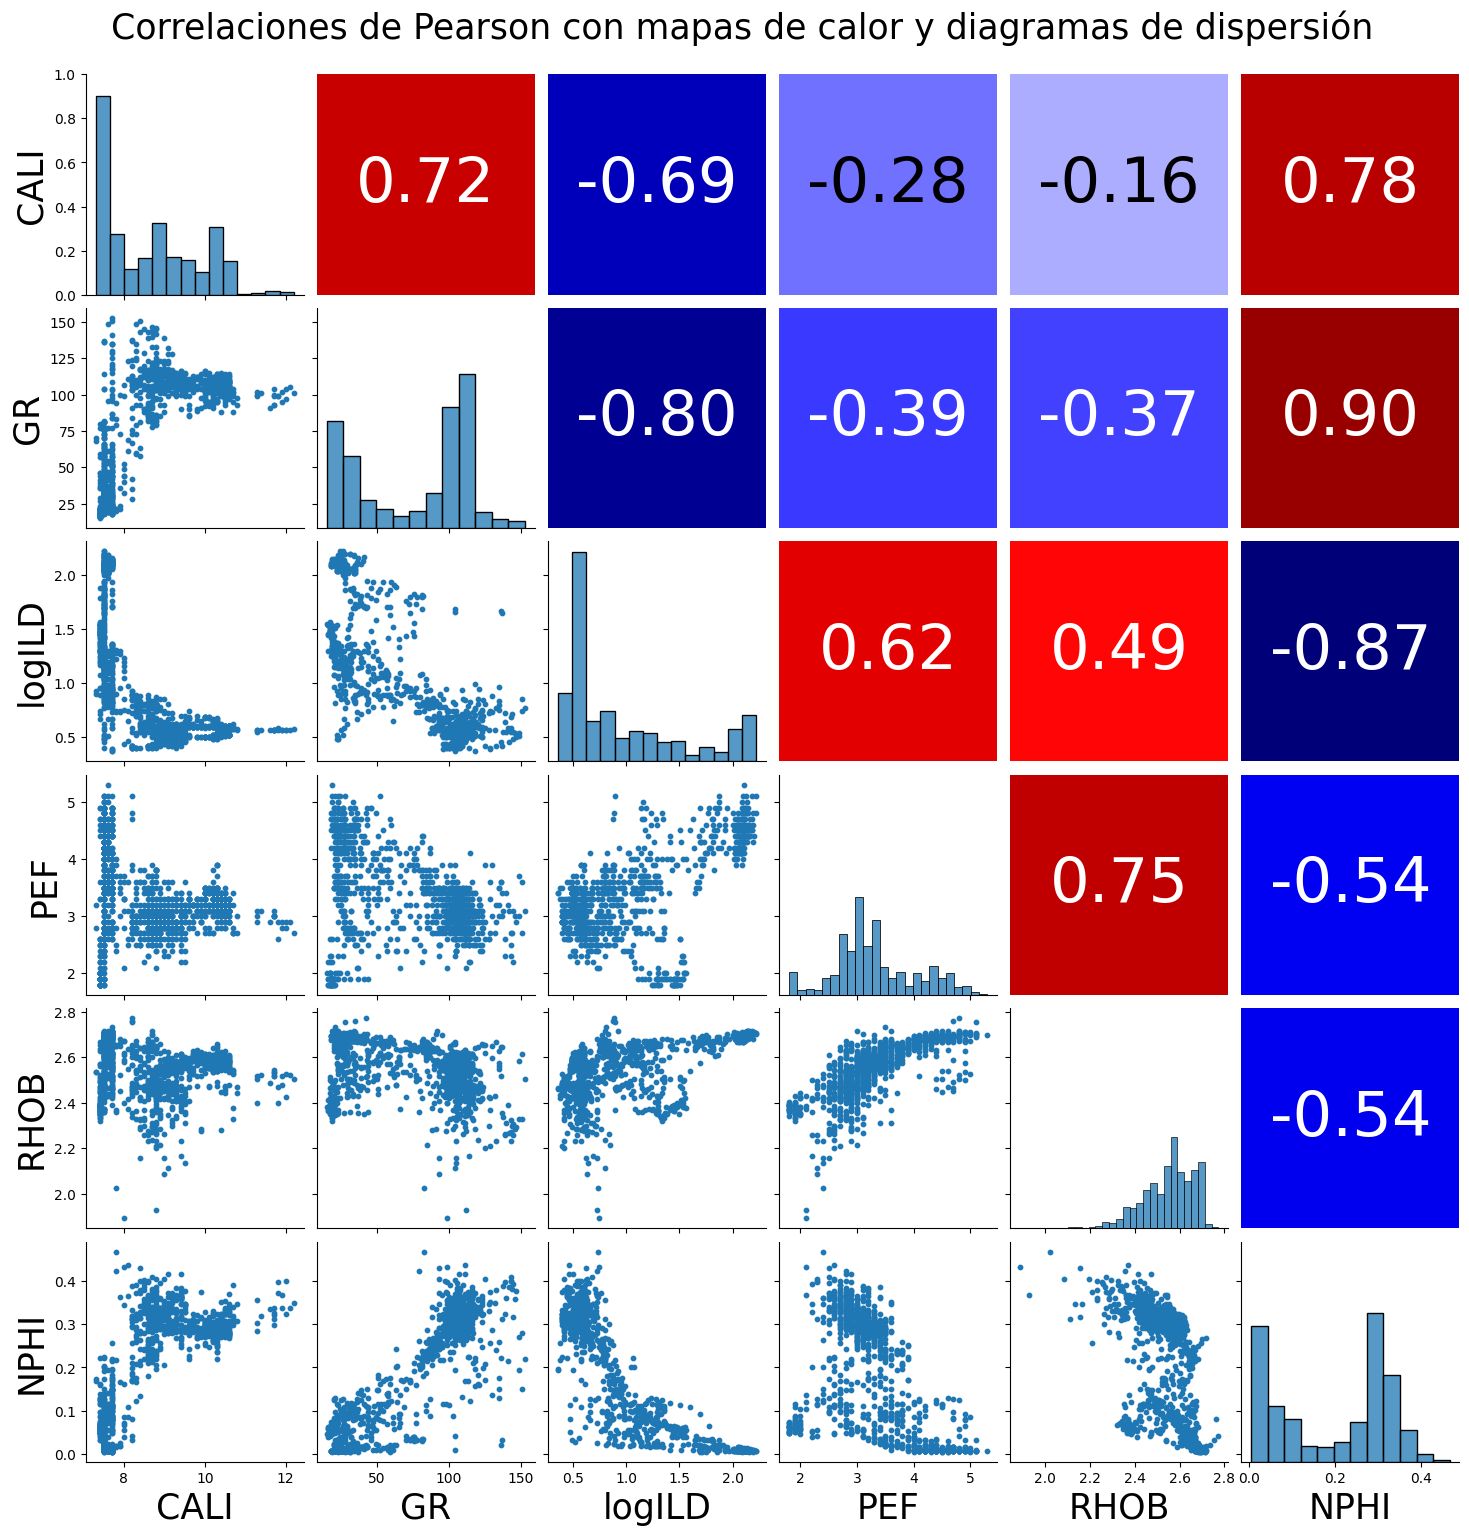

In [52]:
d1 = data_wlogILD
mpl.rcParams["axes.labelsize"] = 25
mpl.rcParams["figure.facecolor"] = "w"
g = sns.PairGrid(d1)
g.map_lower(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=False)
g.map_upper(pearson_corrfunc, cmap=plt.get_cmap('seismic'), norm=plt.Normalize(vmin=-1, vmax=1))
g.fig.subplots_adjust(wspace=0.06, hspace=0.06) # equal spacing in both directions
g.fig.suptitle('Correlaciones de Pearson con mapas de calor y diagramas de dispersión',size=25, y=1.025)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Matriz_correlacion/heatmap_pearson.png', dpi=600, bbox_inches="tight")
plt.show()

# Puntos de la tarea

1- Obtener la estadística básica: Media, varianza, mediana, cuartiles,
curtosis, Coeficiente de simetría, máximo, mínimo, coeficiente de
variación.

## Estadistica univariada

In [ ]:
for mnemonicos in np.array(data.keys()):
    print('---------------------')
    print(mnemonicos)
    print('---------------------')
    print('---------------------')
    estadisticas = estadistica_basica(data[mnemonicos])
    print(estadisticas)
    estadisticas.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Estadigrafos/{mnemonicos}_estadigrafos.csv', index=False)


---------------------
DEPTH
---------------------
---------------------
                 Estadígrafo Valor Numérico
0               No. muestras        1201.00
1                     Mínimo        5000.00
2                         Q1        5150.00
3                    Mediana        5300.00
4                      Media        5300.00
5                         Q3        5450.00
6                     Máximo        5600.00
7                      Rango         600.00
8                        IQR         300.00
9                   Varianza       30075.04
10       Desviacion estándar         173.35
11  Coeficiente de variación           0.03
12                  Simetría           0.00
13                  Curtosis           1.80
---------------------
CALI
---------------------
---------------------
                 Estadígrafo Valor Numérico
0               No. muestras        1201.00
1                     Mínimo           7.30
2                         Q1           7.50
3                    

In [ ]:
estadisticas_logtrans = estadistica_basica(data['ILD'], log_trans=True)
estadisticas_logtrans.to_csv(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Estadigrafos/logILD_estadigrafos.csv', index=False)
print(estadisticas_logtrans)

                 Estadígrafo Valor Numérico
0               No. muestras        1201.00
1                     Mínimo           0.36
2                         Q1           0.56
3                    Mediana           0.68
4                      Media           0.97
5                         Q3           1.29
6                     Máximo           2.22
7                      Rango           1.86
8                        IQR           0.73
9                   Varianza           0.31
10       Desviacion estándar           0.56
11  Coeficiente de variación           0.58
12                  Simetría           1.01
13                  Curtosis           2.60


---------------------
DEPTH
---------------------
None


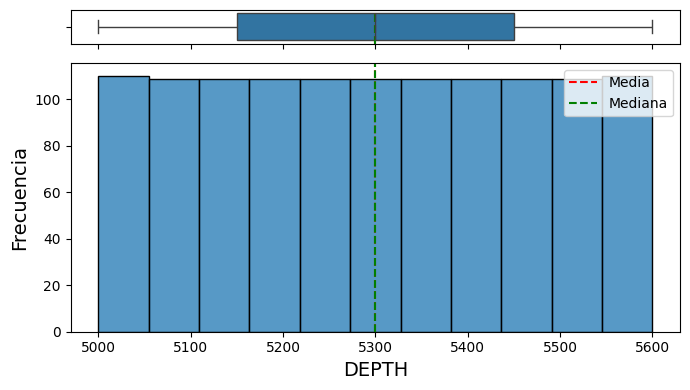

---------------------
CALI
---------------------
None


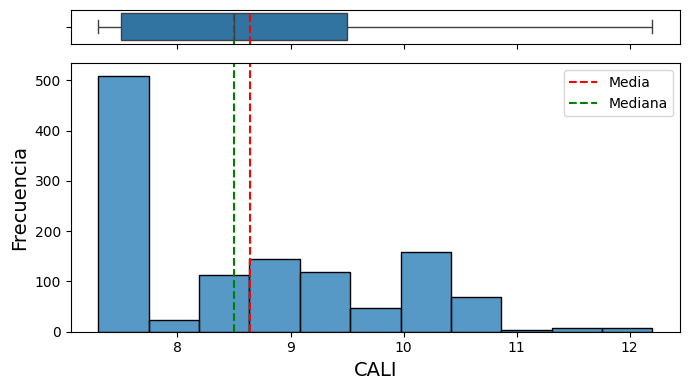

---------------------
GR
---------------------
None


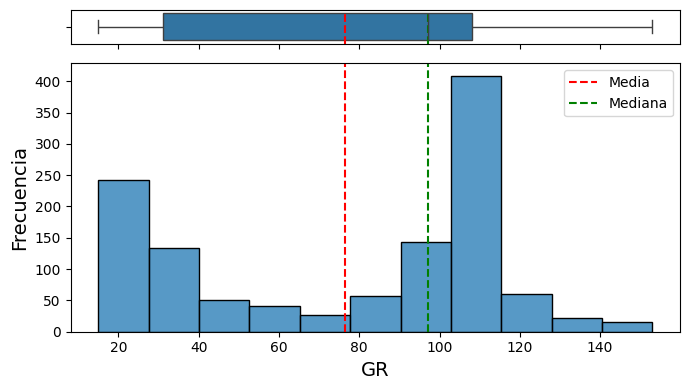

---------------------
ILD
---------------------
None


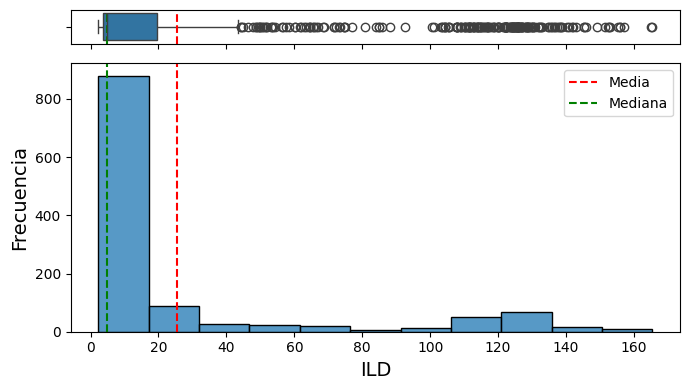

---------------------
PEF
---------------------
None


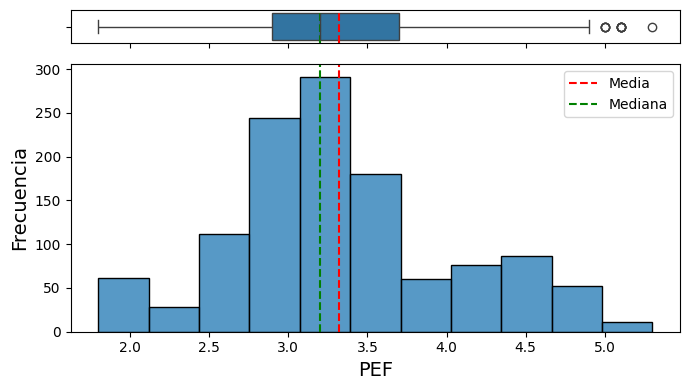

---------------------
RHOB
---------------------
None


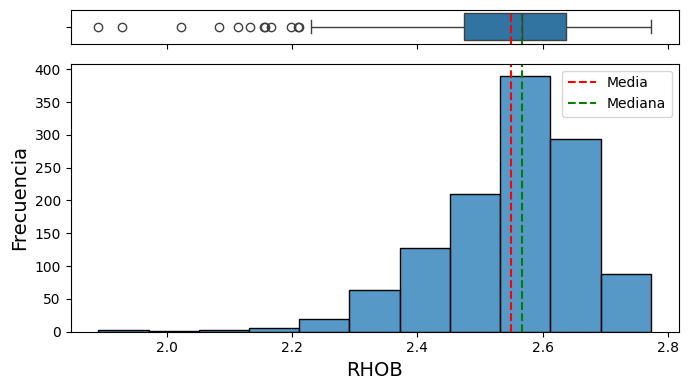

---------------------
NPHI
---------------------
None


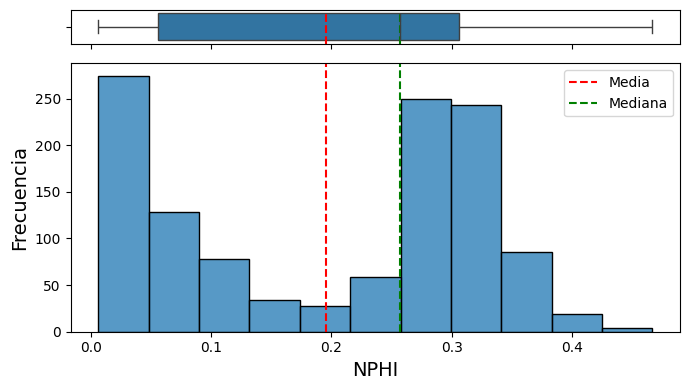

---------------------
SHALE
---------------------
None


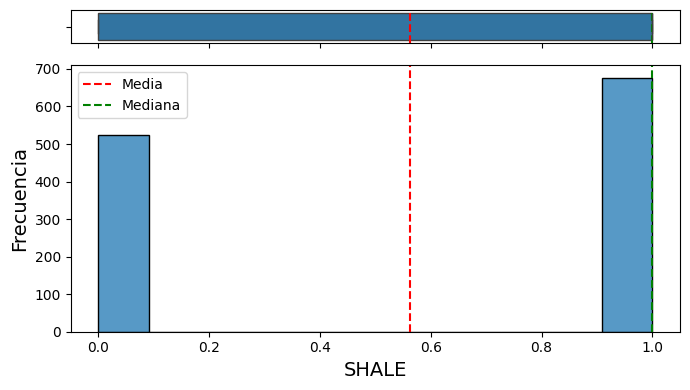

In [ ]:
for mnemonicos in np.array(data.keys()):
    print('---------------------')
    print(mnemonicos)
    print('---------------------')
    print(plot_boxplot_histogram(data[mnemonicos]))
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Histogramas/{mnemonicos}_estadigrafos.png', dpi=600)
    plt.show()

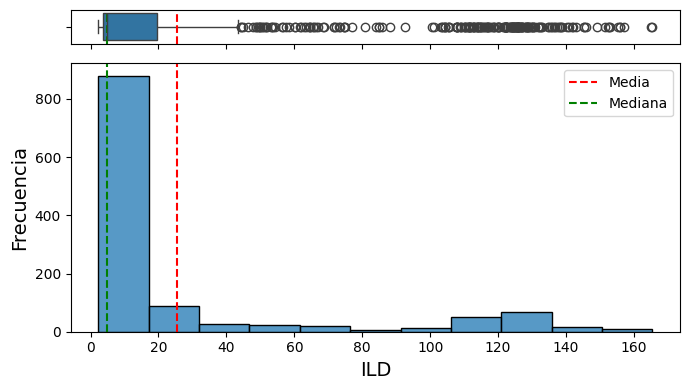

In [ ]:
plot_boxplot_histogram(data['ILD'], log_trans=False)

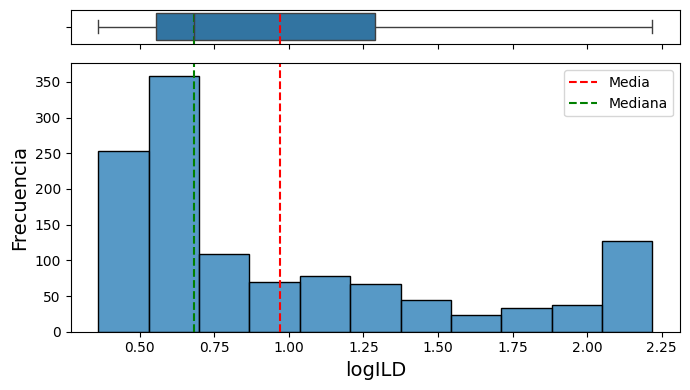

In [ ]:
plot_boxplot_histogram(data['ILD'], log_trans=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Histogramas/logILD_estadigrafos.png', dpi=600)
plt.show()

In [ ]:
def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

def outliers_iqr_mod(data):
  quartil1 = data.quantile(0.25)
  quartil3 = data.quantile(0.75)

  iqr = quartil3 - quartil1

  upper_limit = quartil3 + 1.5 * iqr
  lower_limit = quartil1 - 1.5 * iqr

  outliers = data[(data < lower_limit) | (data > upper_limit)]

  return outliers

def outliers_iqr(data, rgp):
  quartil1 = data[rgp].quantile(0.25)
  quartil3 = data[rgp].quantile(0.75)

  iqr = quartil3 - quartil1

  upper_limit = quartil3 + 1.5 * iqr
  lower_limit = quartil1 - 1.5 * iqr

  new_data_cap = data.copy()
  new_data_cap[rgp] = np.where(new_data_cap[rgp] > upper_limit, upper_limit,
                               np.where(new_data_cap[rgp] < lower_limit,lower_limit,
                                        new_data_cap[rgp]))

  plot_boxplot_histogram(data[rgp])
  plot_boxplot_histogram(new_data_cap[rgp])

  return new_data_cap

                 Estadígrafo Valor Numérico
0               No. muestras        1201.00
1                     Mínimo           2.30
2                         Q1           3.60
3                    Mediana           4.80
4                      Media          13.88
5                         Q3          19.50
6                     Máximo          43.35
7                      Rango          41.05
8                        IQR          15.90
9                   Varianza         231.07
10       Desviacion estándar          15.19
11  Coeficiente de variación           1.09
12                  Simetría           1.19
13                  Curtosis           2.72
                 Estadígrafo Valor Numérico
0               No. muestras        1201.00
1                     Mínimo           2.30
2                         Q1           3.60
3                    Mediana           4.80
4                      Media          25.35
5                         Q3          19.50
6                     Máximo    

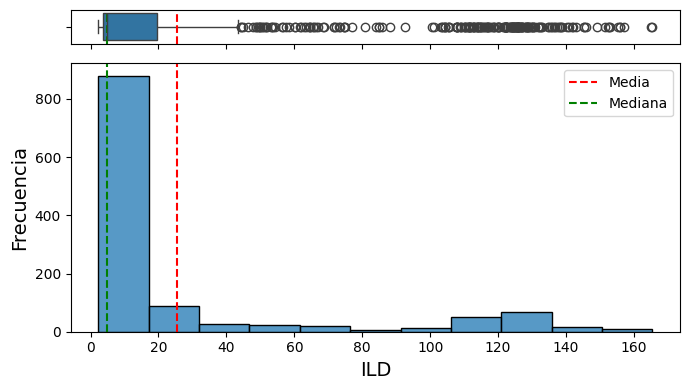

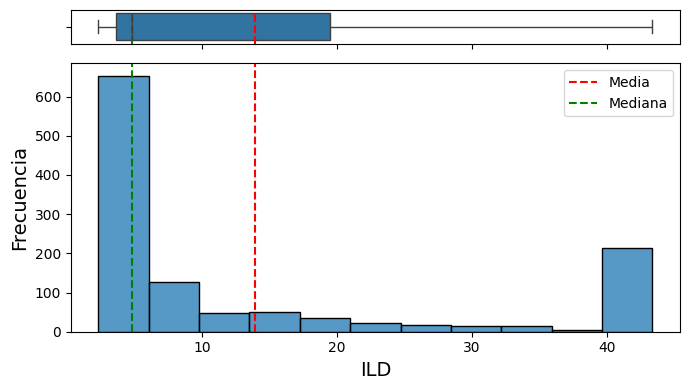

In [ ]:
new_data_outliers = outliers_iqr(data, rgp='ILD')

print(estadistica_basica(new_data_outliers['ILD']))
print(estadistica_basica(data['ILD']))

Se eliminaron 212 filas debido a outliers.


Estadígrafo Valor Numérico
0               No. muestras         989.00
1                     Mínimo           2.30
2                         Q1           3.30
3                    Mediana           4.00
4                      Media           7.57
5                         Q3           7.90
6                     Máximo          43.30
7                      Rango          41.00
8                        IQR           4.60
9                   Varianza          54.39
10       Desviacion estándar           7.37
11  Coeficiente de variación           0.97
12                  Simetría           2.20
13                  Curtosis           7.51

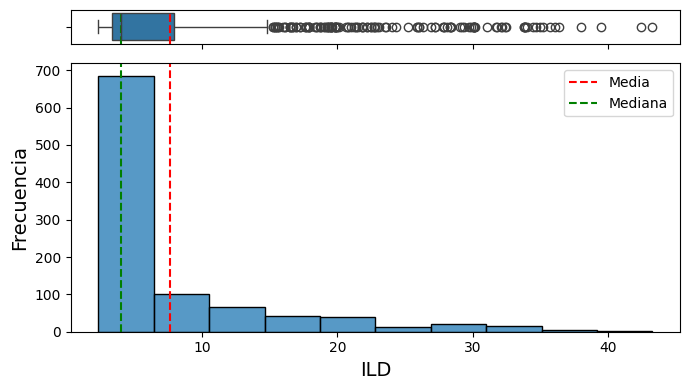

In [ ]:
outliers = outliers_iqr_mod(data['ILD'])

data_sin_outliers = data[~data.isin(outliers)].dropna()

plot_boxplot_histogram(data_sin_outliers['ILD'])

filas_eliminadas = len(data) - len(data_sin_outliers)
print(f"Se eliminaron {filas_eliminadas} filas debido a outliers.")

estadistica_basica(data_sin_outliers['ILD'])

Estadígrafo Valor Numérico
0               No. muestras        1070.00
1                     Mínimo           2.30
2                         Q1           3.40
3                    Mediana           4.10
4                      Media          25.51
5                         Q3          11.70
6                     Máximo         165.40
7                      Rango         163.10
8                        IQR           8.30
9                   Varianza        1879.16
10       Desviacion estándar          43.33
11  Coeficiente de variación           1.70
12                  Simetría           1.79
13                  Curtosis           4.51

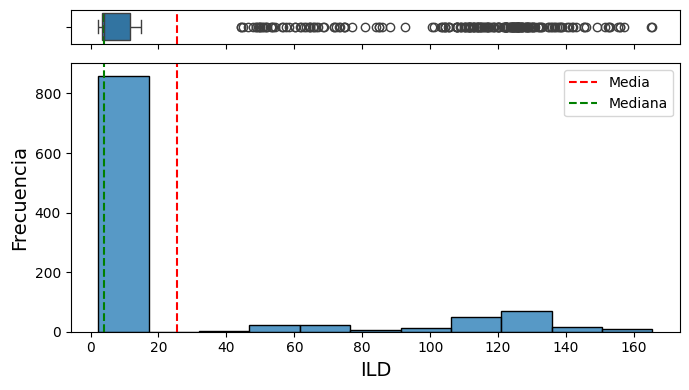

In [ ]:
outliers1 = outliers_iqr_mod(data_sin_outliers['ILD'])

data_sin_outliers1 = data_sin_outliers1[~data_sin_outliers1.isin(outliers1)].dropna()

plot_boxplot_histogram(data_sin_outliers1['ILD'])

estadistica_basica(data_sin_outliers1['ILD'])

In [ ]:
def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

def plot_with_outliers(data):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(np.arange(len(data)), data, alpha=0.7)
    outliers = identify_outliers(data)
    if not outliers.empty:
        ax.scatter(np.arange(len(outliers)), outliers, color='r', alpha=0.7, label='Outliers')
    ax.set_title(f'Plot with Outliers: {data.name}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    if not outliers.empty:
        ax.legend()
    plt.tight_layout()
    plt.show()

------------------------------
DEPTH
------------------------------
Outliers for DEPTH:
Series([], Name: DEPTH, dtype: float64)


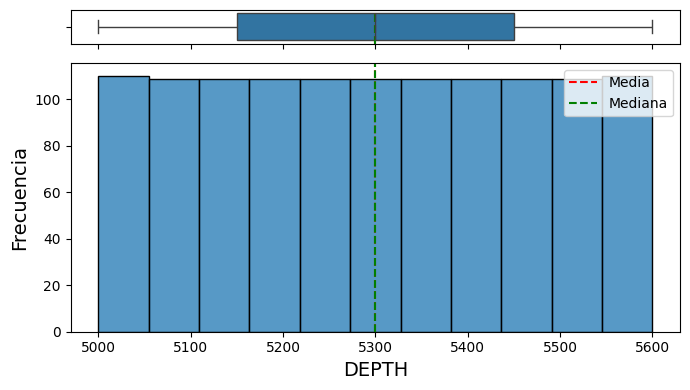

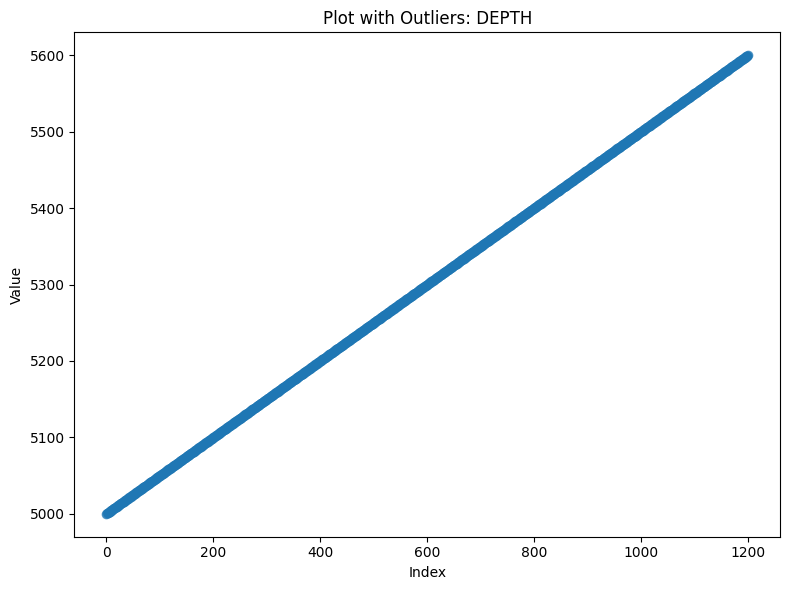

------------------------------
CALI
------------------------------
Outliers for CALI:
Series([], Name: CALI, dtype: float64)


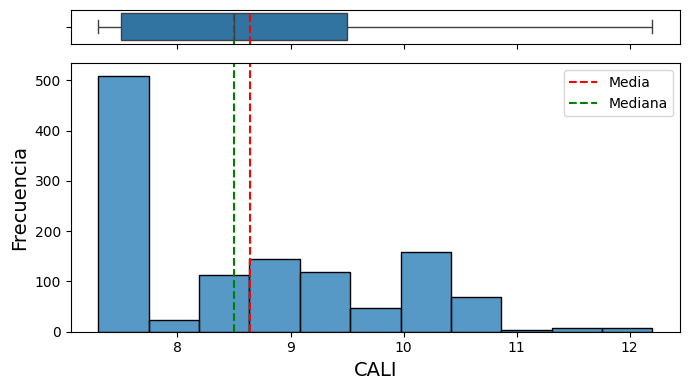

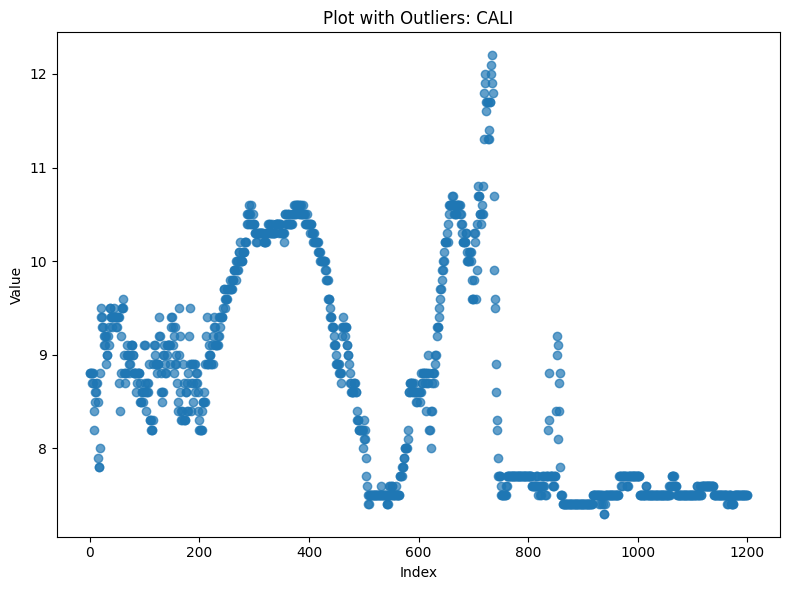

------------------------------
GR
------------------------------
Outliers for GR:
Series([], Name: GR, dtype: int64)


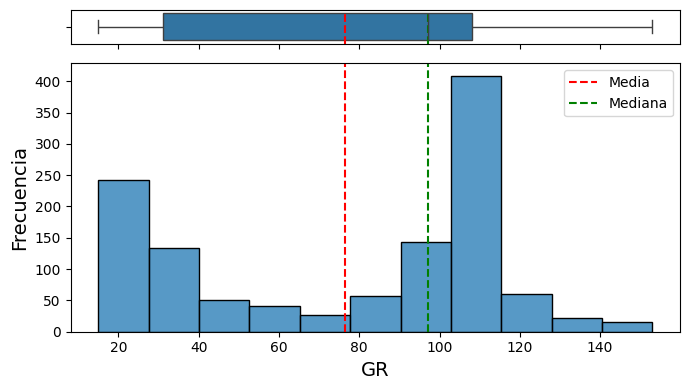

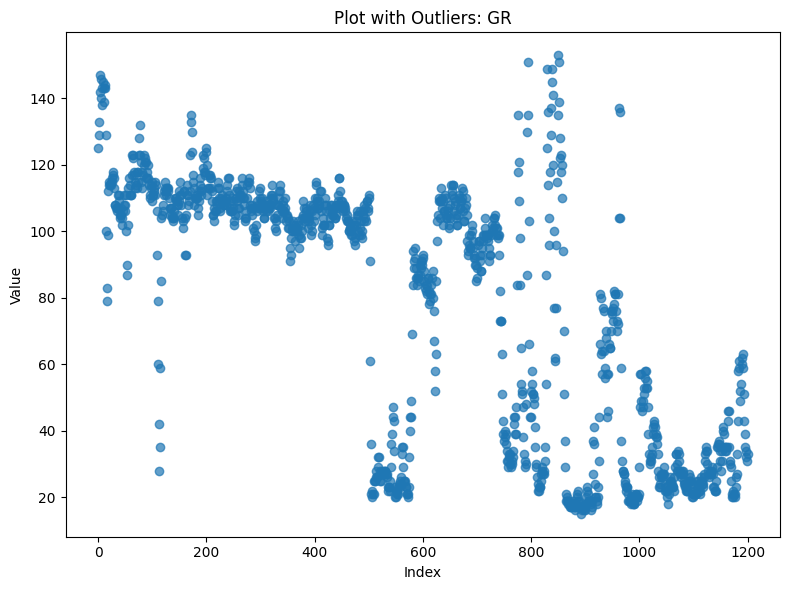

------------------------------
ILD
------------------------------
Outliers for ILD:
951     44.3
952     53.6
953     62.0
954     63.5
955     62.9
        ... 
1196    64.6
1197    68.5
1198    71.8
1199    73.3
1200    74.6
Name: ILD, Length: 212, dtype: float64


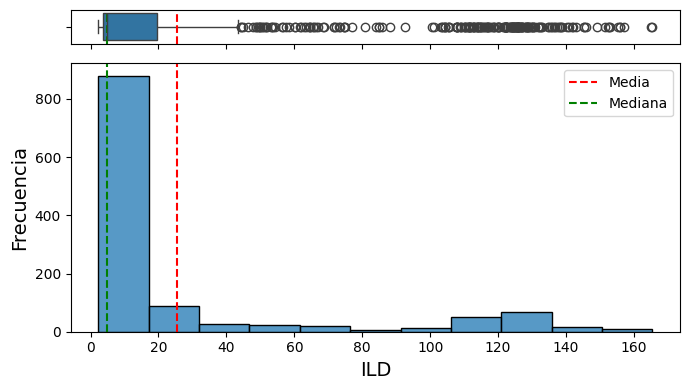

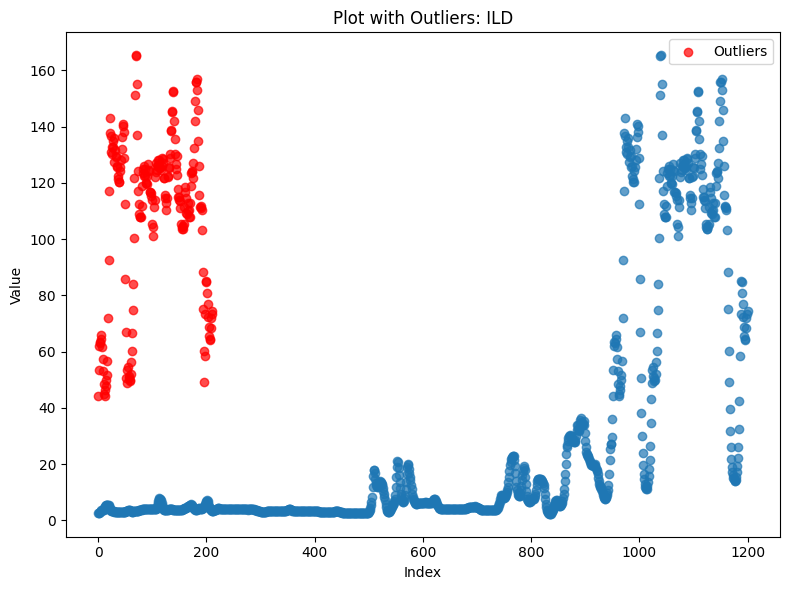

------------------------------
PEF
------------------------------
Outliers for PEF:
113     5.1
980     5.0
981     5.3
982     5.1
986     5.1
1037    5.0
1038    5.1
1039    5.1
1178    5.0
1187    5.1
1200    5.0
Name: PEF, dtype: float64


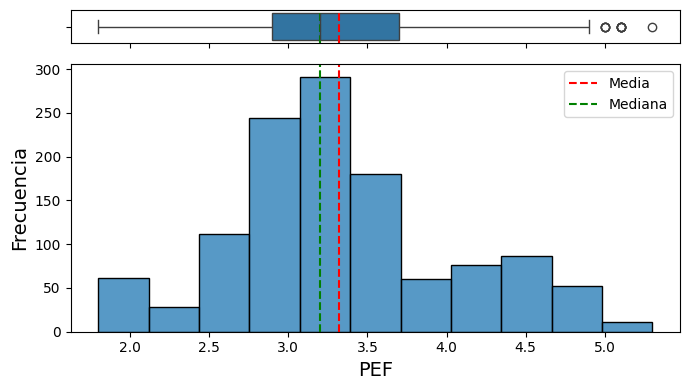

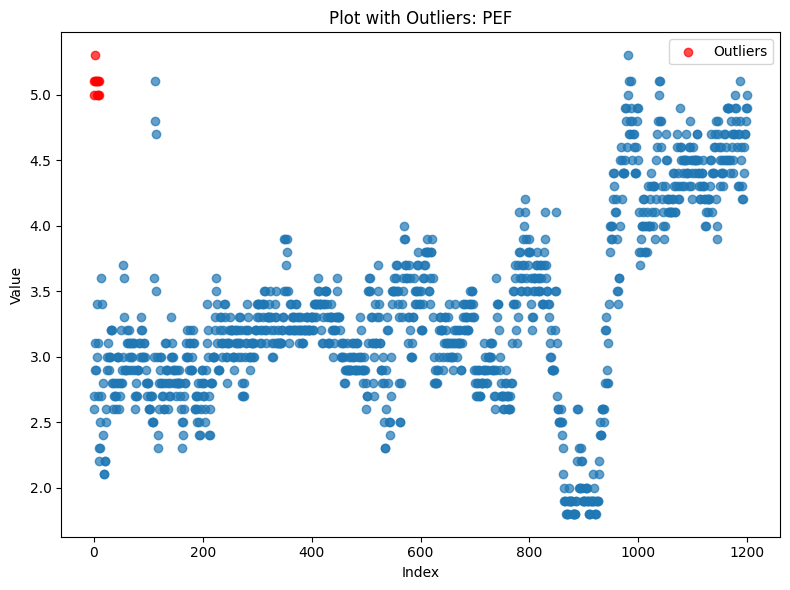

------------------------------
RHOB
------------------------------
Outliers for RHOB:
0      2.199
1      2.209
17     2.023
18     1.891
19     1.929
20     2.167
116    2.212
117    2.114
118    2.157
161    2.155
162    2.084
163    2.133
Name: RHOB, dtype: float64


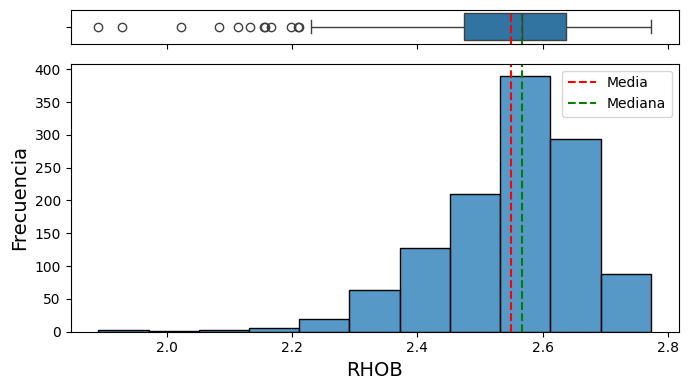

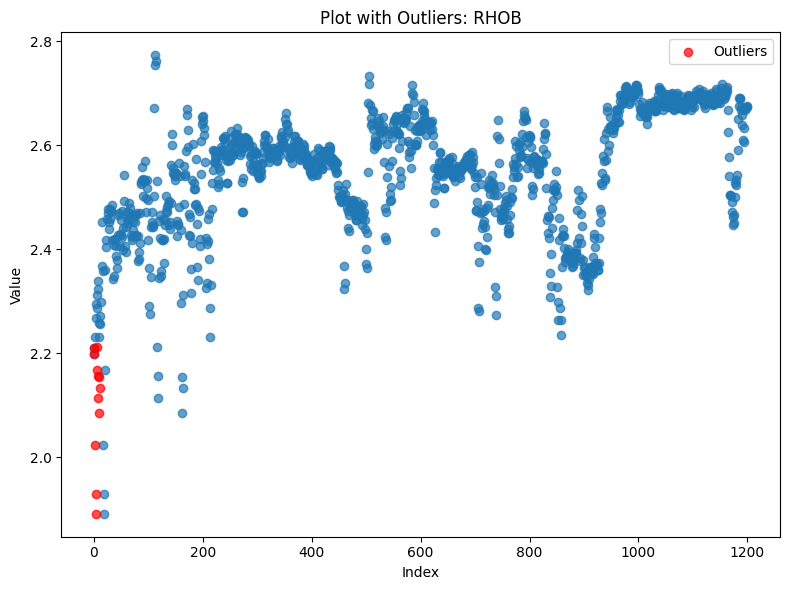

------------------------------
NPHI
------------------------------
Outliers for NPHI:
Series([], Name: NPHI, dtype: float64)


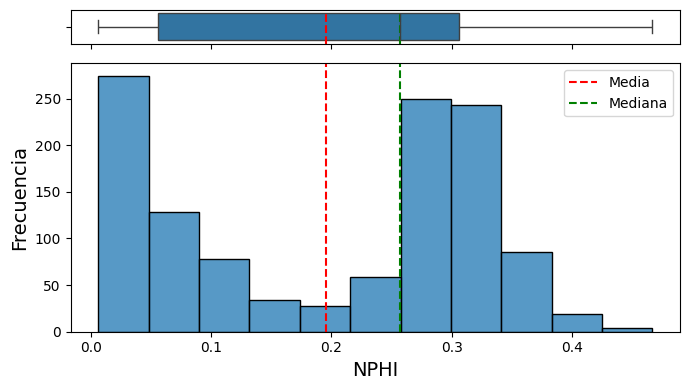

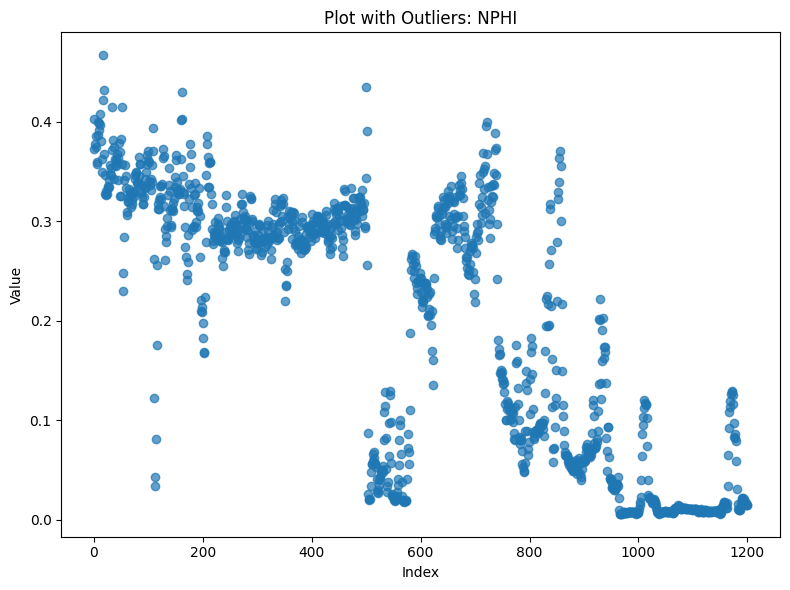

------------------------------
SHALE
------------------------------
Outliers for SHALE:
Series([], Name: SHALE, dtype: int64)


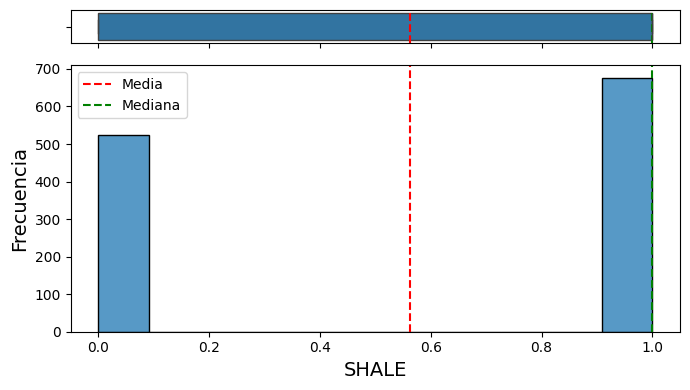

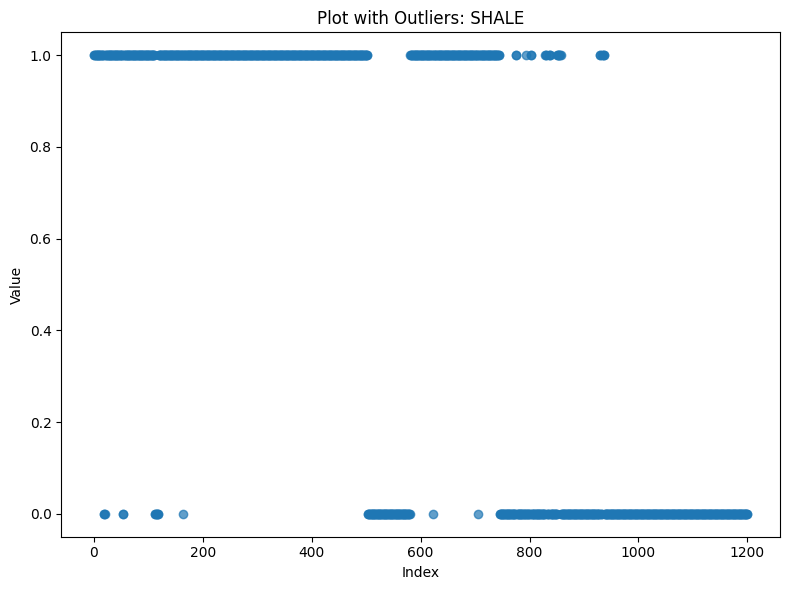

In [ ]:
for mnemonicos in np.array(data.keys()):
    print('-' * 30)
    print(mnemonicos)
    print('-' * 30)
    plot_boxplot_histogram(data[mnemonicos])
    #plot_qq(data[mnemonicos])
    outliers = identify_outliers(data[mnemonicos])
    print(f"Outliers for {mnemonicos}:\n{outliers}")
    plot_with_outliers(data[mnemonicos])

## Estadistica bivariada

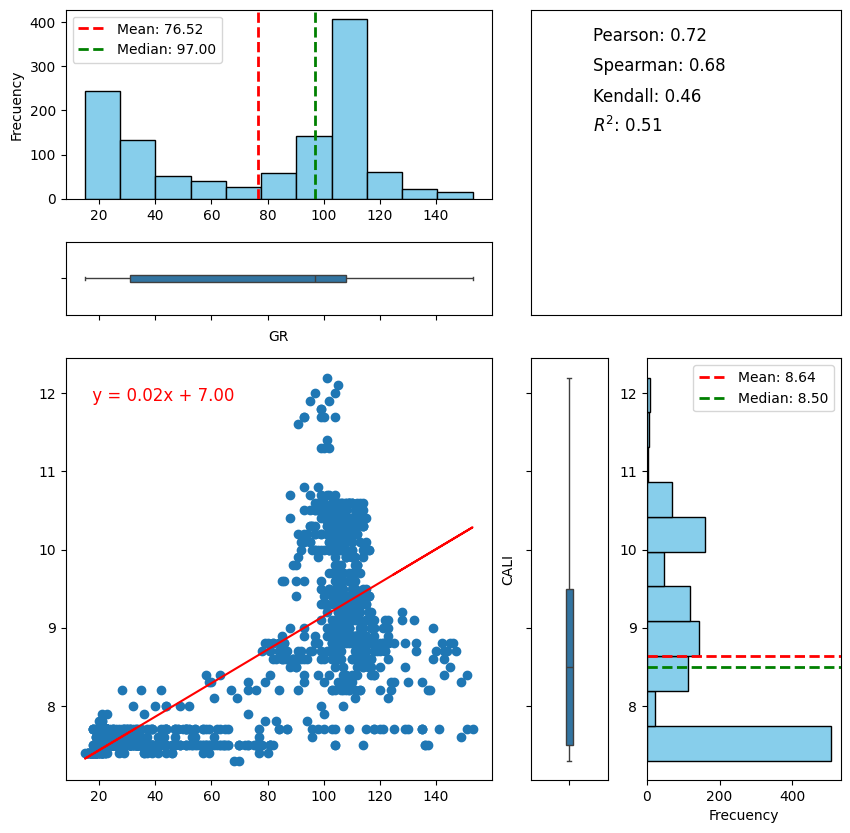

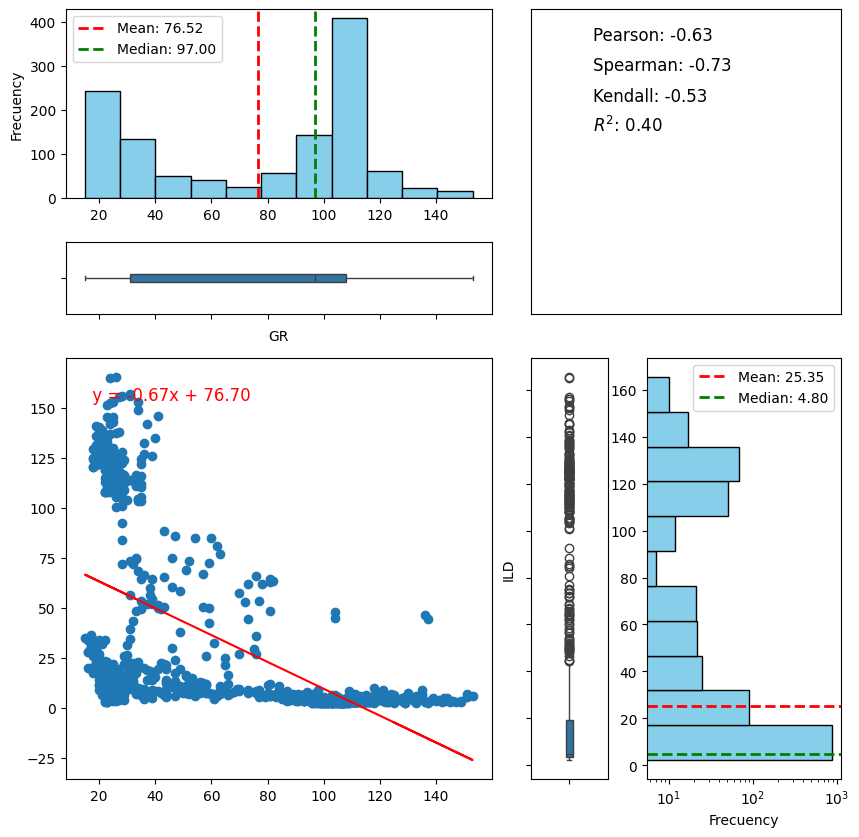

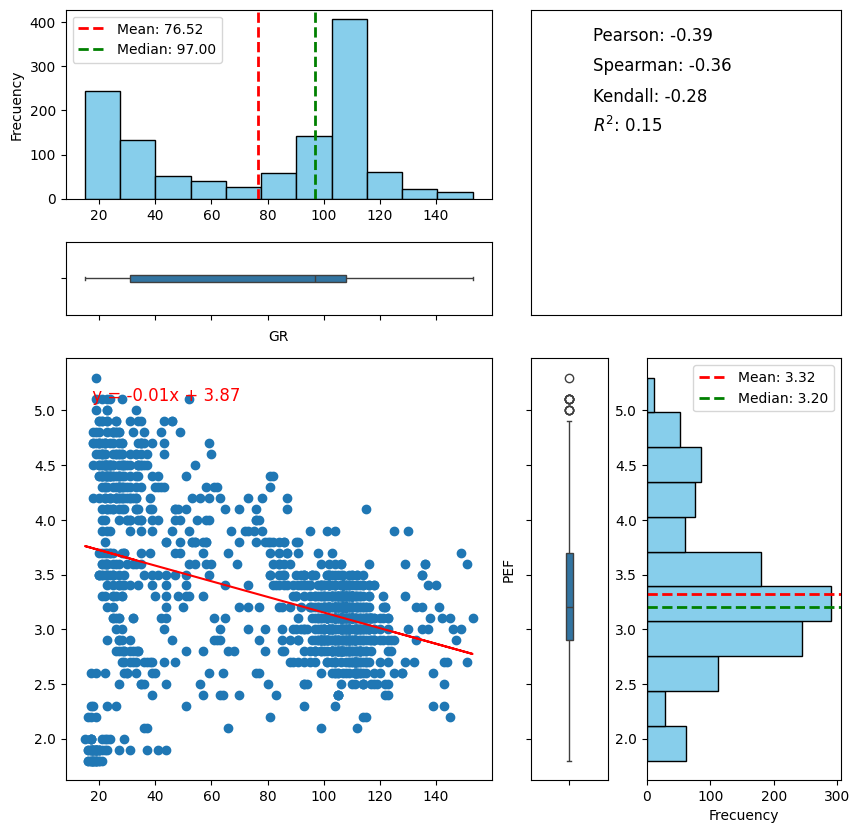

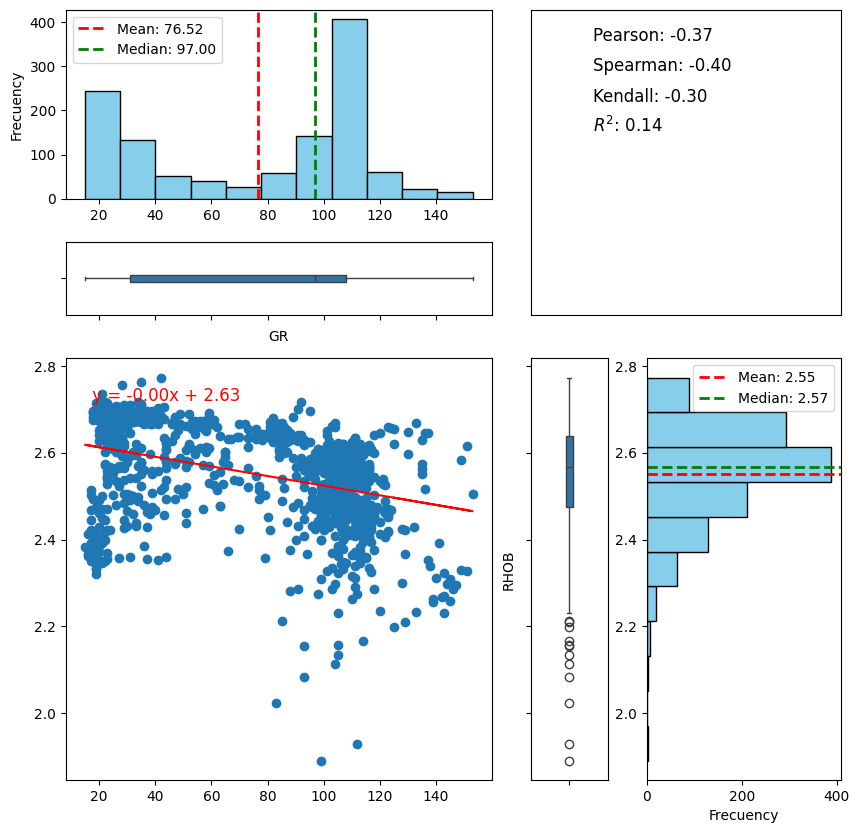

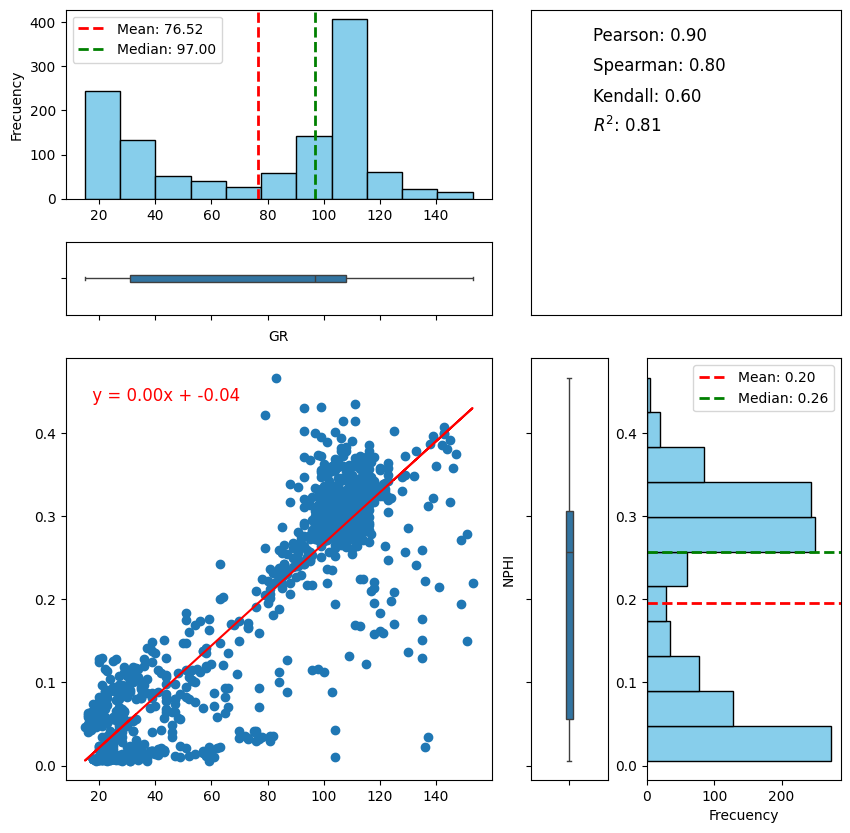

In [ ]:
plotxy(data.GR, data.CALI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/GR_CALI_bivariado.png', dpi=600)
plt.show()
plotxy(data.GR, data.ILD, log_x=False, log_y=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/GR_ILD_bivariado.png', dpi=600)
plt.show()
plotxy(data.GR, data.PEF, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/GR_PEF_bivariado.png', dpi=600)
plt.show()
plotxy(data.GR, data.RHOB, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/GR_RHOB_bivariado.png', dpi=600)
plt.show()
plotxy(data.GR, data.NPHI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/GR_NPHI_bivariado.png', dpi=600)
plt.show()

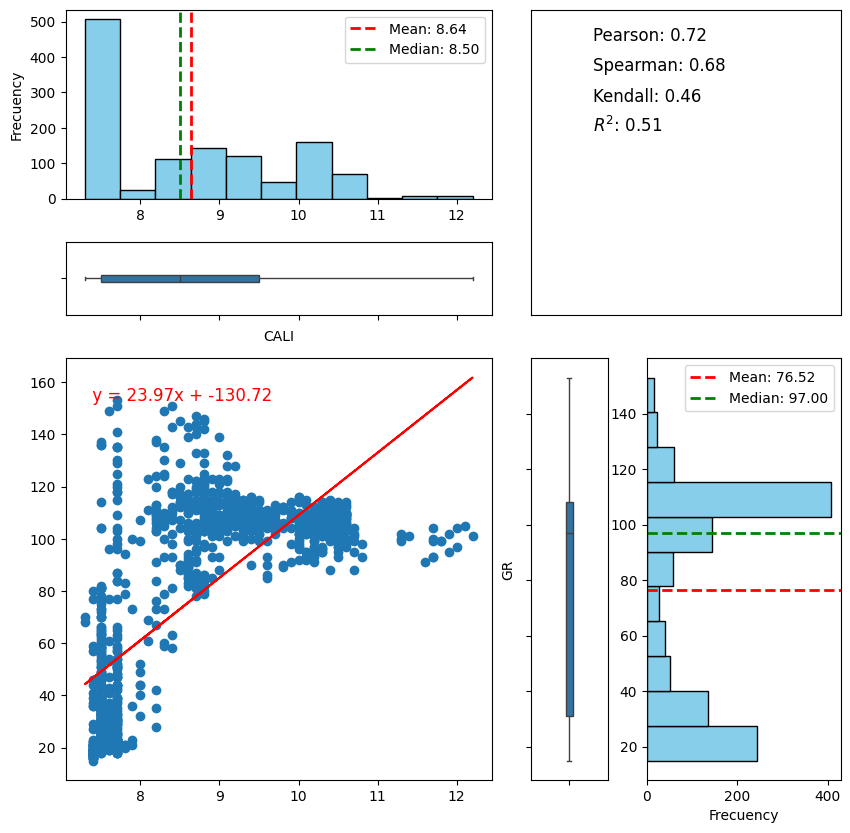

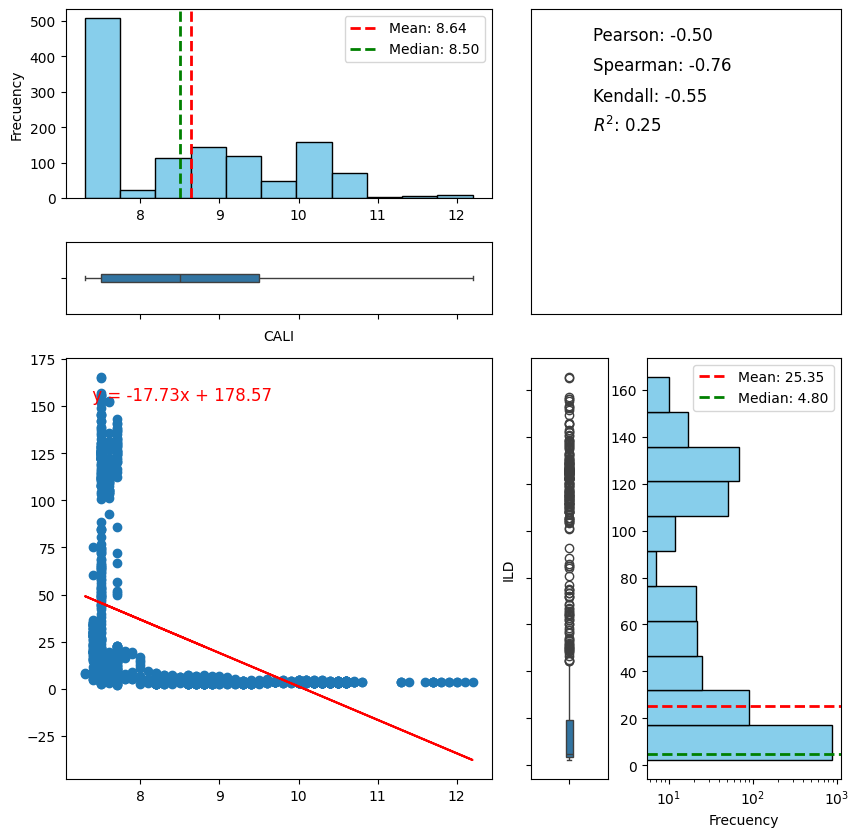

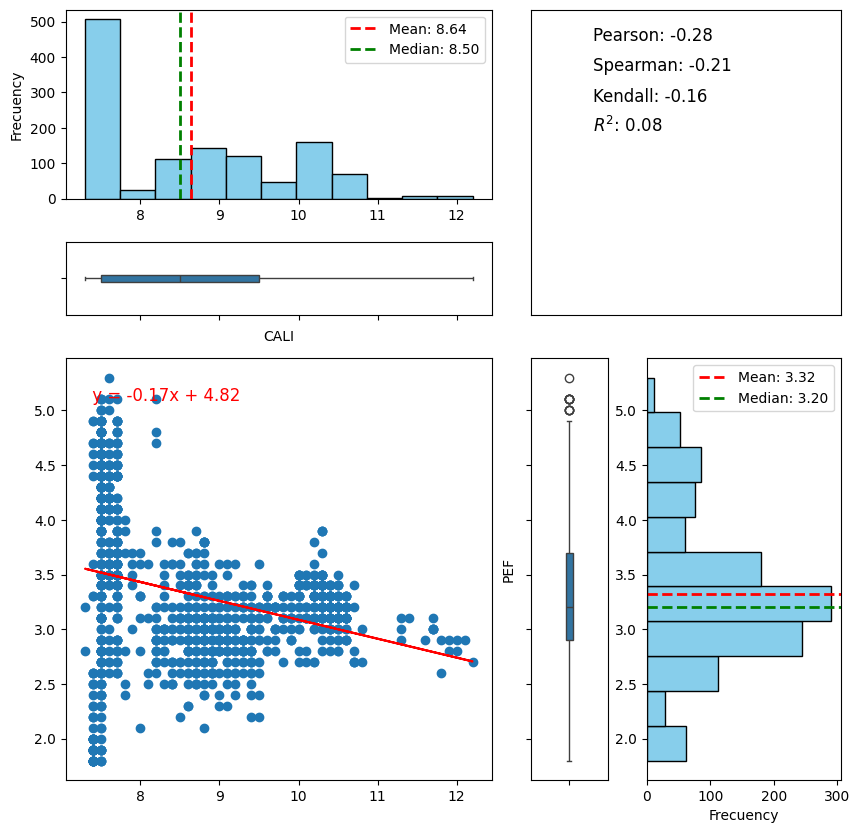

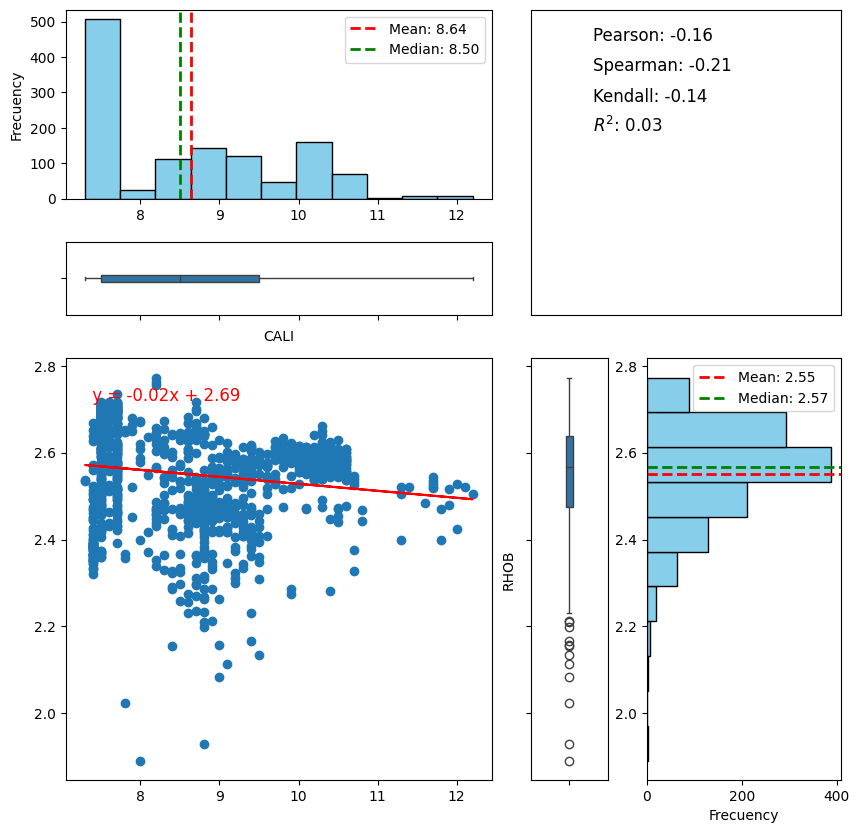

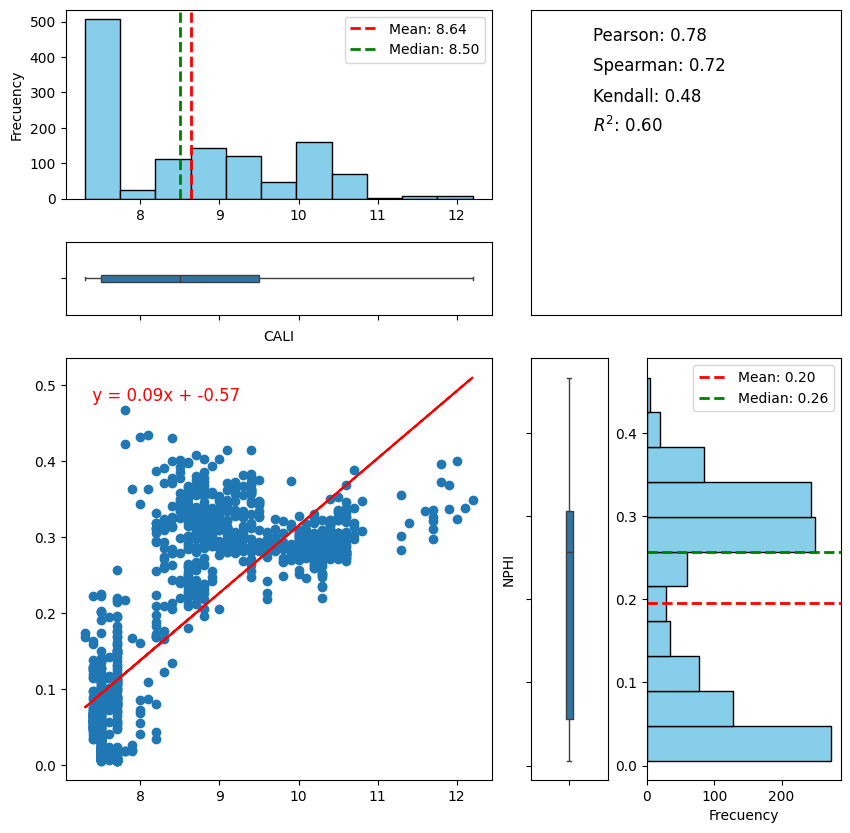

In [ ]:
plotxy(data.CALI, data.GR, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/CALI_GR_bivariado.png', dpi=600)
plt.show()
plotxy(data.CALI, data.ILD, log_x=False, log_y=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/CALI_ILD_bivariado.png', dpi=600)
plt.show()
plotxy(data.CALI, data.PEF, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/CALI_PEF_bivariado.png', dpi=600)
plt.show()
plotxy(data.CALI, data.RHOB, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/CALI_RHOB_bivariado.png', dpi=600)
plt.show()
plotxy(data.CALI, data.NPHI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/CALI_NPHI_bivariado.png', dpi=600)
plt.show()

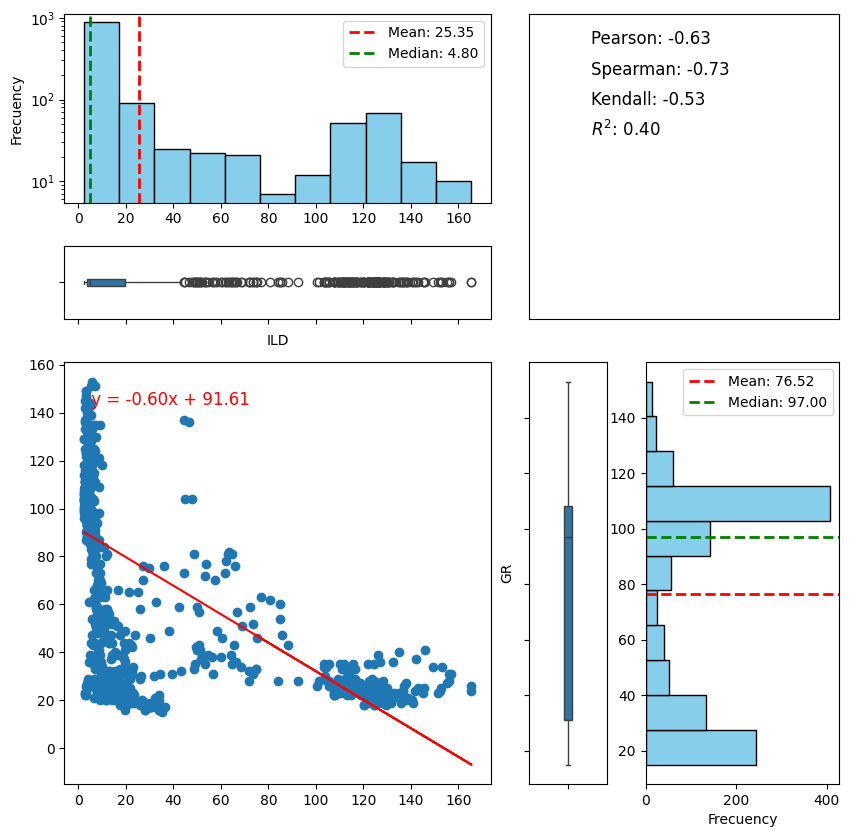

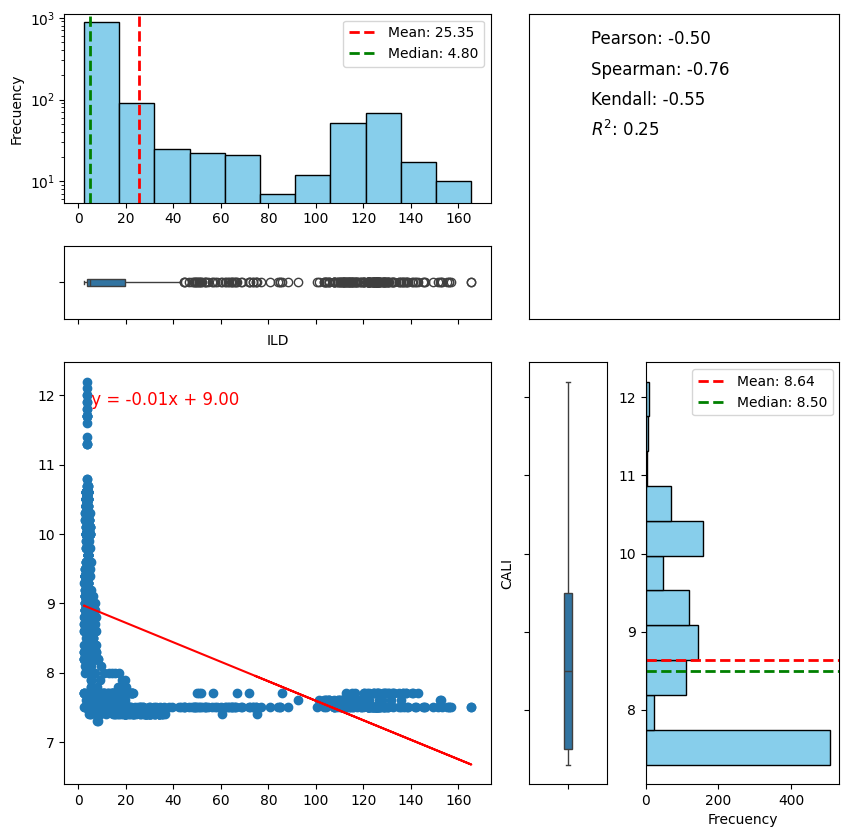

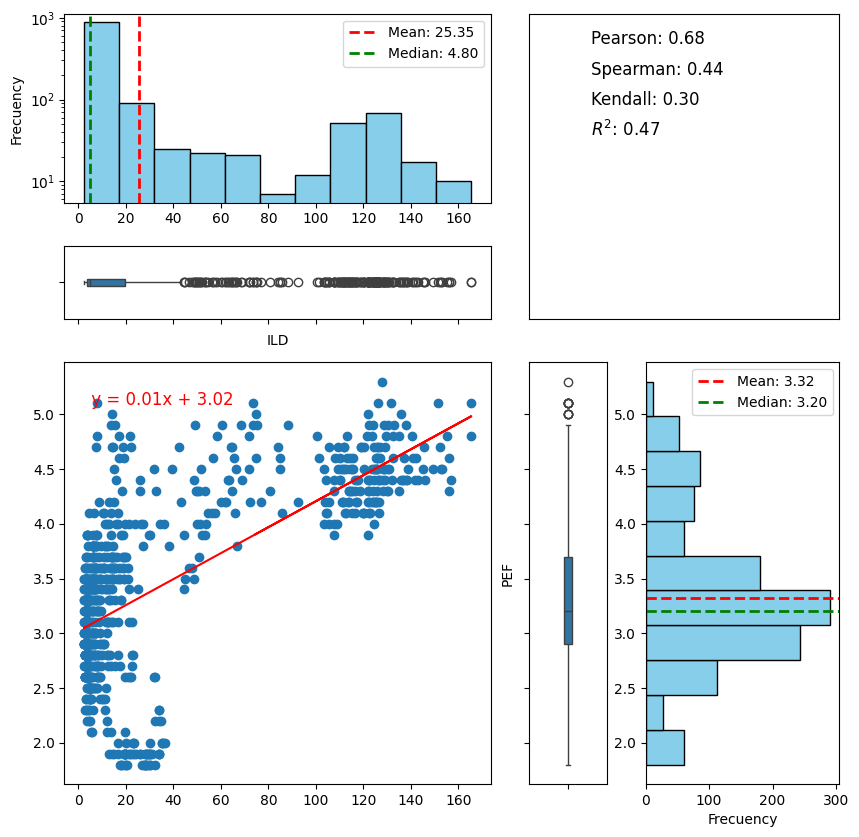

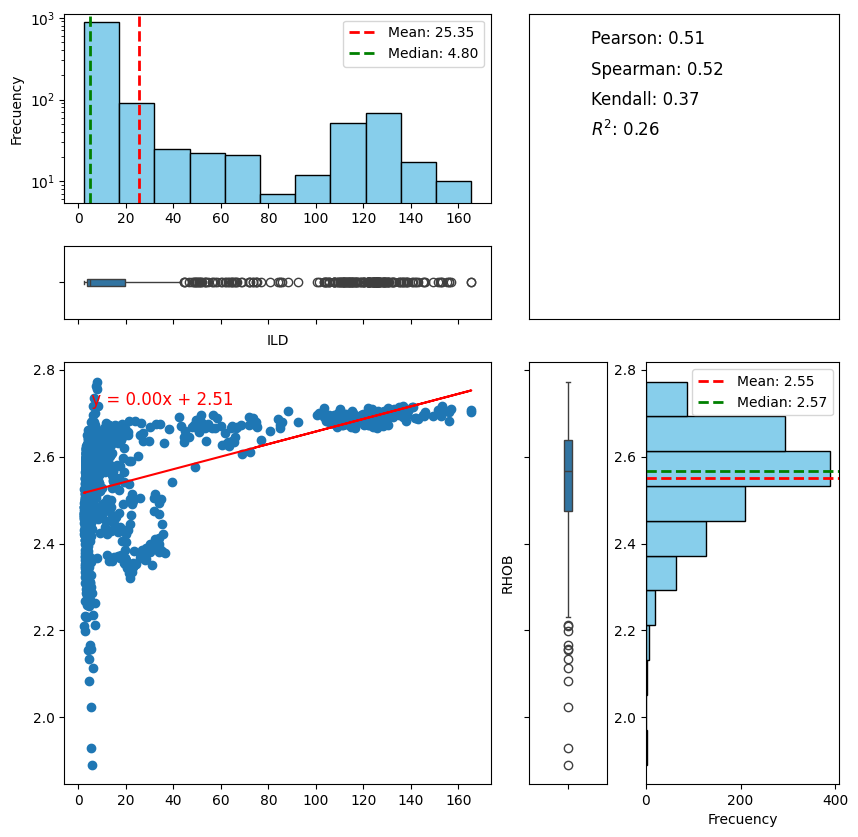

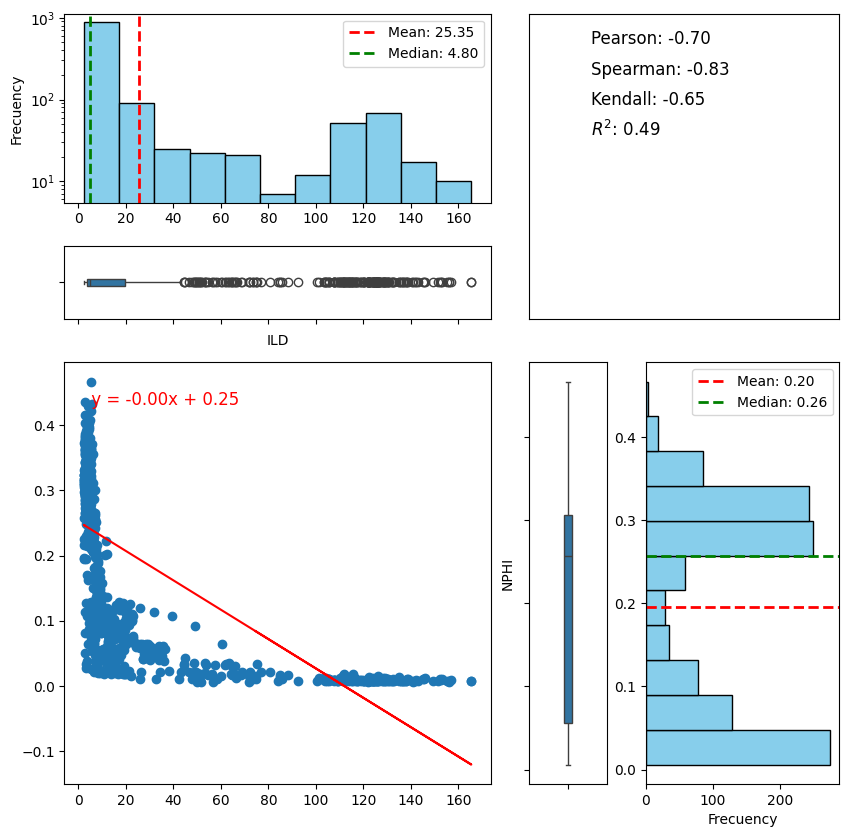

In [ ]:
plotxy(data.ILD, data.GR, log_x=True, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/ILD_GR_bivariado.png', dpi=600)
plt.show()
plotxy(data.ILD, data.CALI, log_x=True, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/ILD_CALI_bivariado.png', dpi=600)
plt.show()
plotxy(data.ILD, data.PEF, log_x=True, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/ILD_PEF_bivariado.png', dpi=600)
plt.show()
plotxy(data.ILD, data.RHOB, log_x=True, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/ILD_RHOB_bivariado.png', dpi=600)
plt.show()
plotxy(data.ILD, data.NPHI, log_x=True, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/ILD_NPHI_bivariado.png', dpi=600)
plt.show()

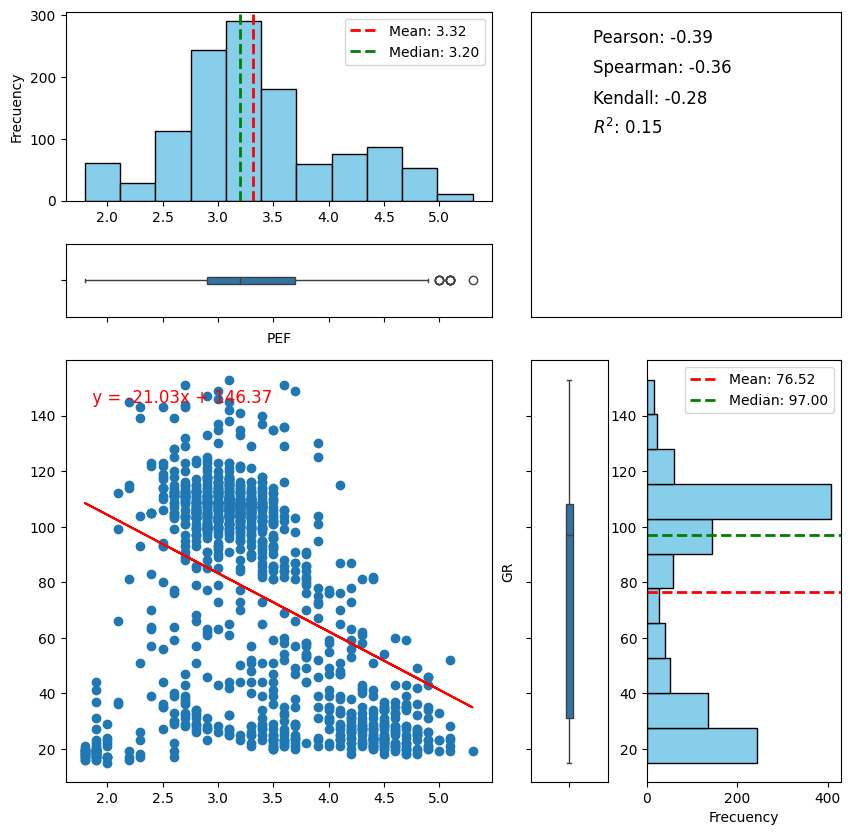

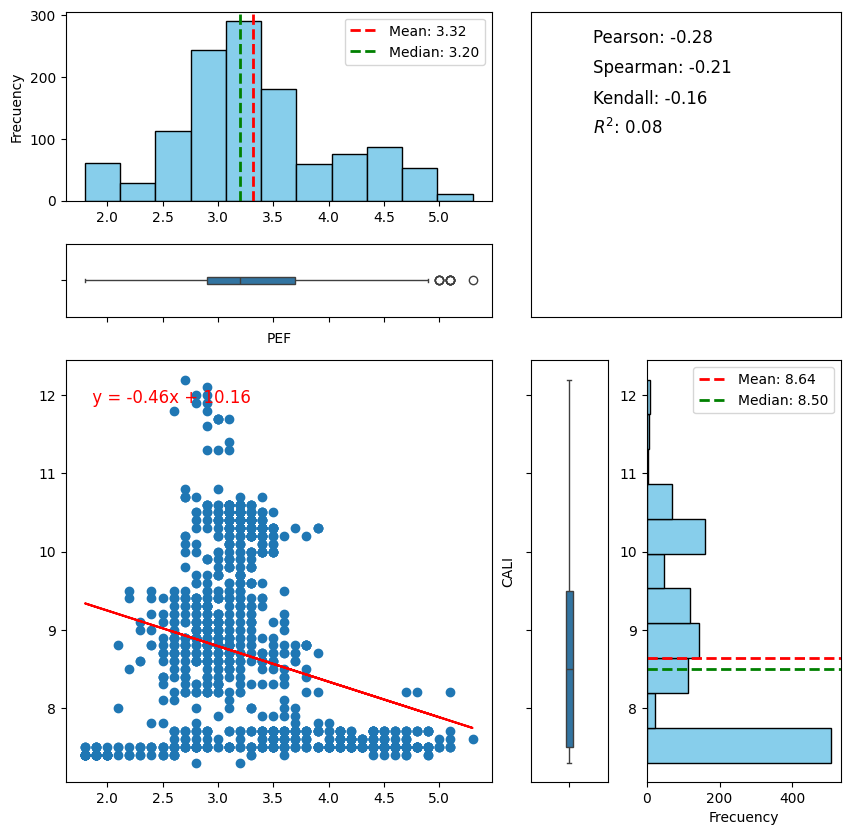

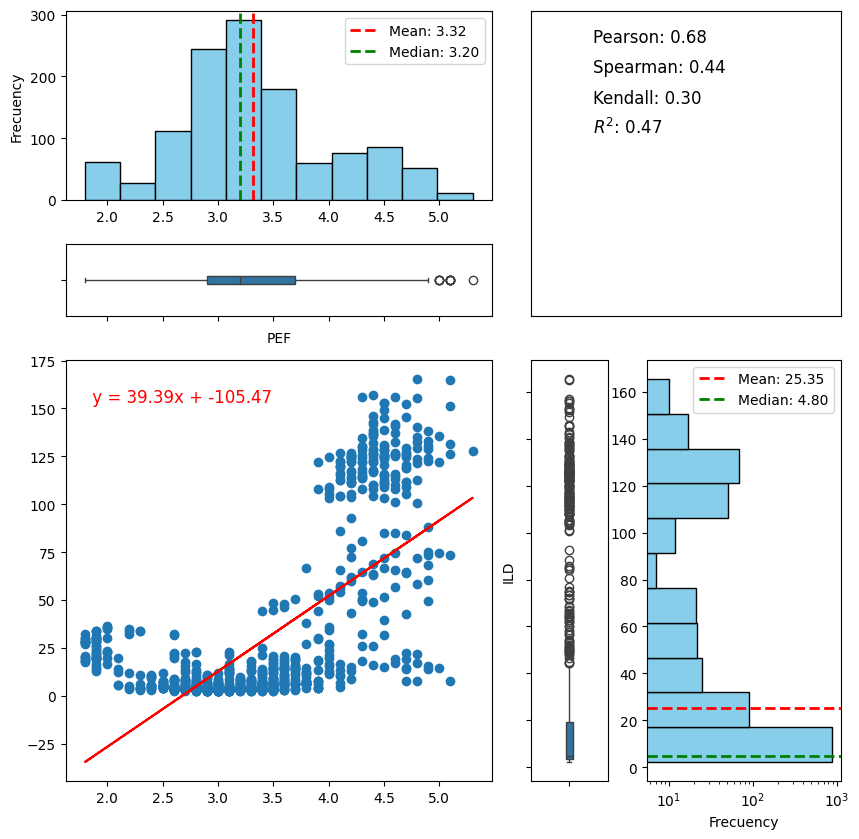

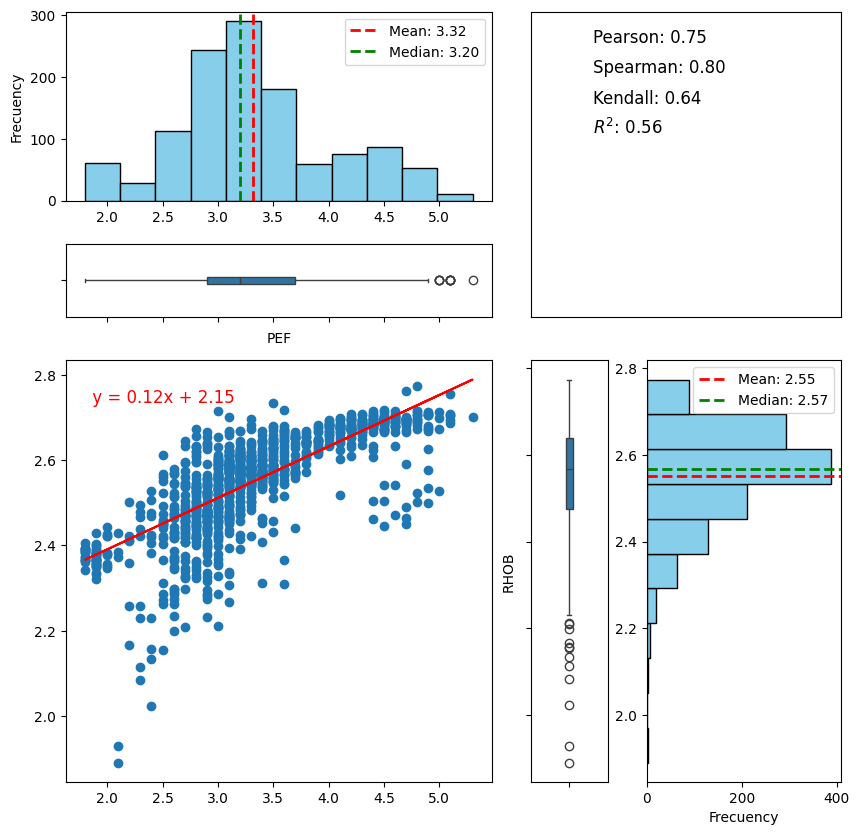

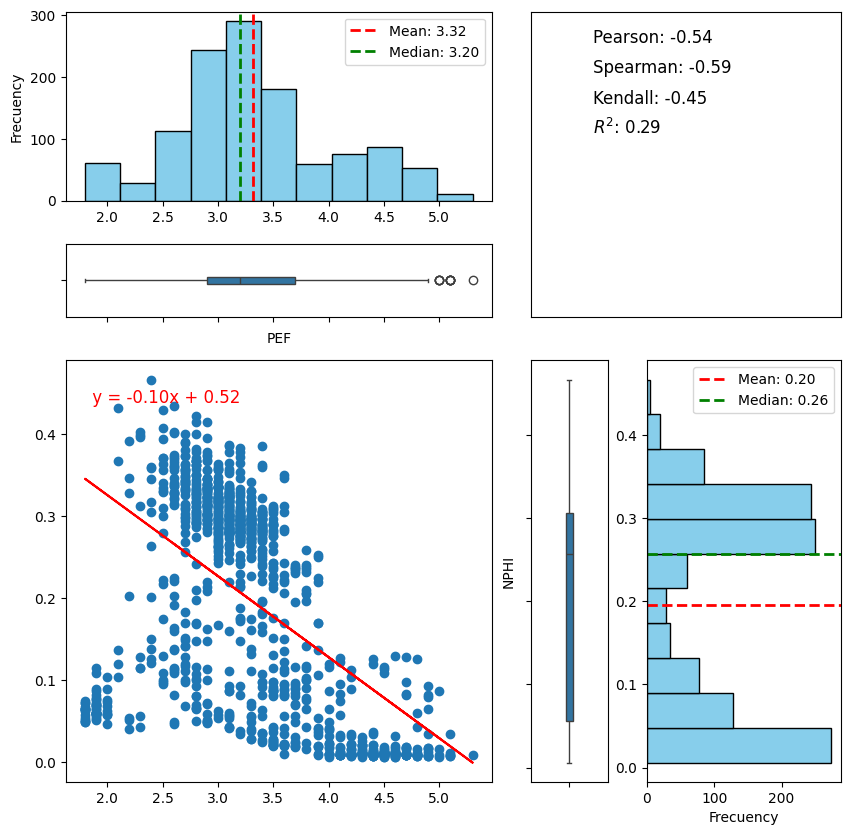

In [ ]:
plotxy(data.PEF, data.GR, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/PEF_GR_bivariado.png', dpi=600)
plt.show()
plotxy(data.PEF, data.CALI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/PEF_CALI_bivariado.png', dpi=600)
plt.show()
plotxy(data.PEF, data.ILD, log_x=False, log_y=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/PEF_ILD_bivariado.png', dpi=600)
plt.show()
plotxy(data.PEF, data.RHOB, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/PEF_RHOB_bivariado.png', dpi=600)
plt.show()
plotxy(data.PEF, data.NPHI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/PEF_NPHI_bivariado.png', dpi=600)
plt.show()

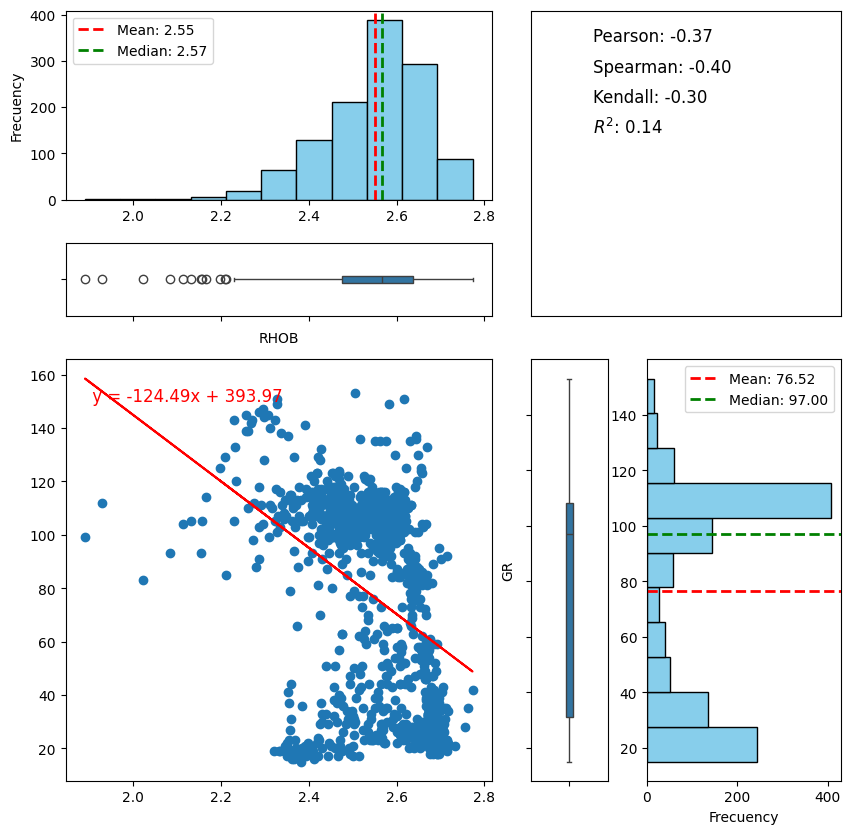

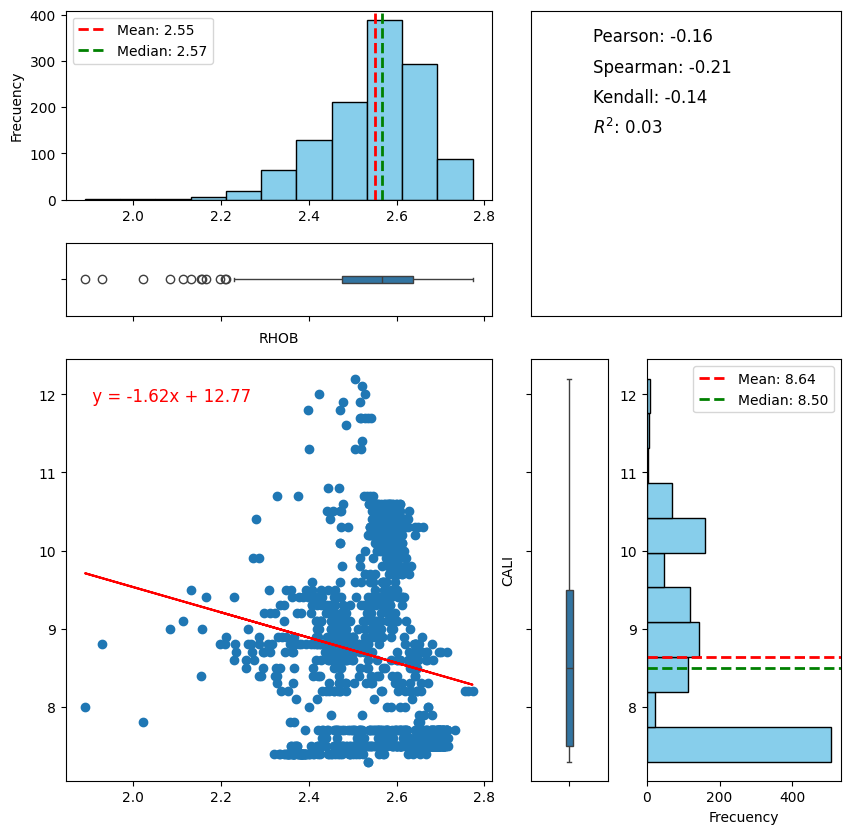

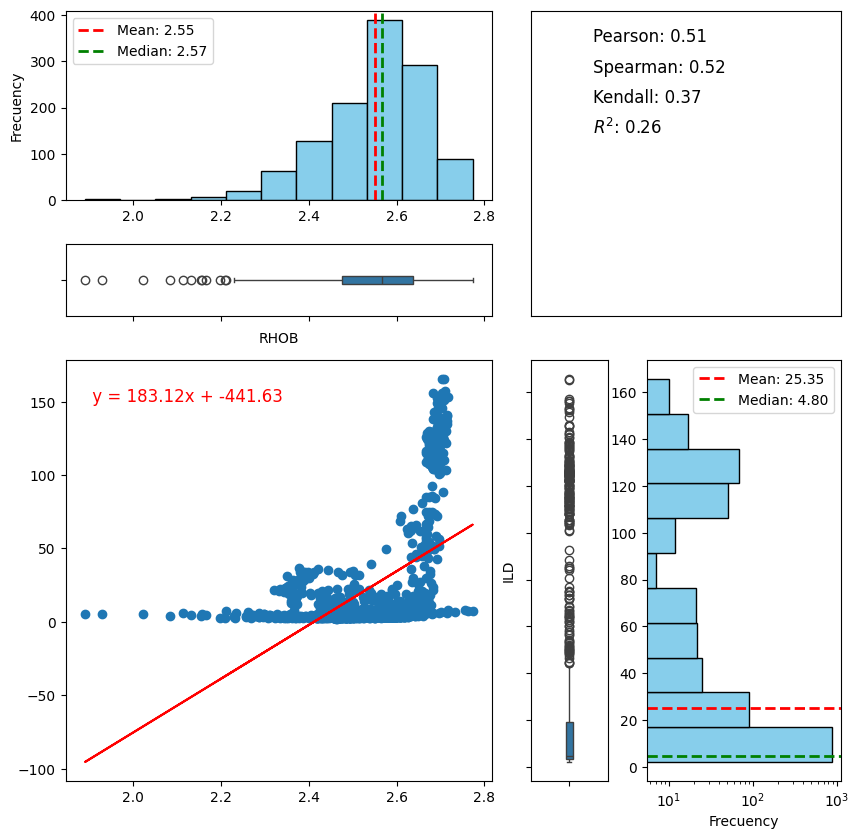

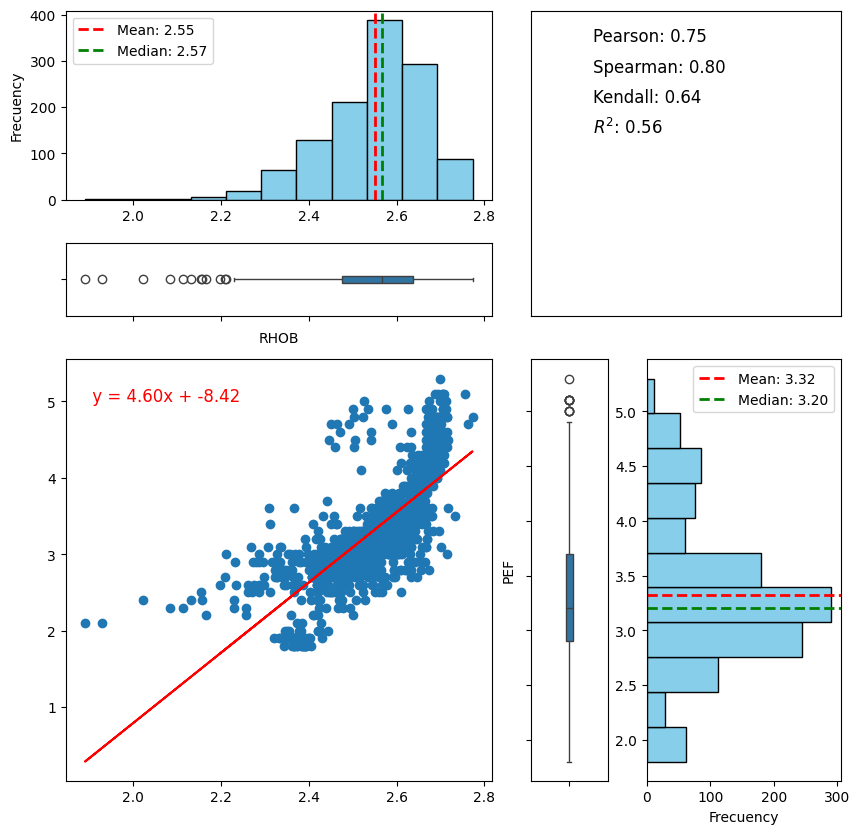

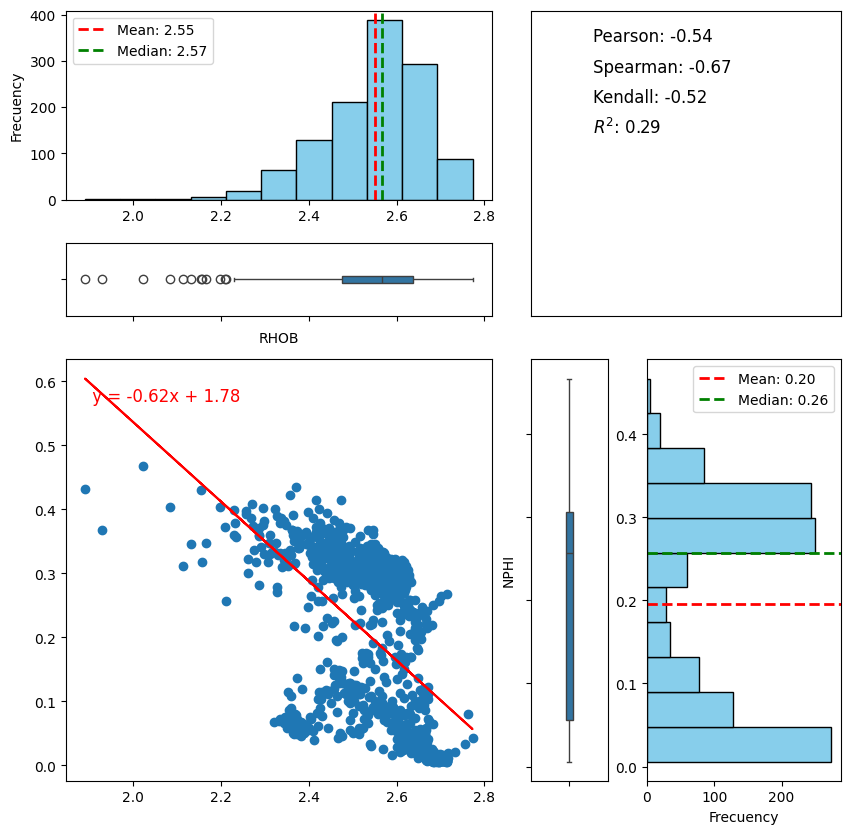

In [ ]:
plotxy(data.RHOB, data.GR, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/RHOB_GR_bivariado.png', dpi=600)
plt.show()
plotxy(data.RHOB, data.CALI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/RHOB_CALI_bivariado.png', dpi=600)
plt.show()
plotxy(data.RHOB, data.ILD, log_x=False, log_y=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/RHOB_ILD_bivariado.png', dpi=600)
plt.show()
plotxy(data.RHOB, data.PEF, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/RHOB_PEF_bivariado.png', dpi=600)
plt.show()
plotxy(data.RHOB, data.NPHI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/RHOB_NPHI_bivariado.png', dpi=600)
plt.show()

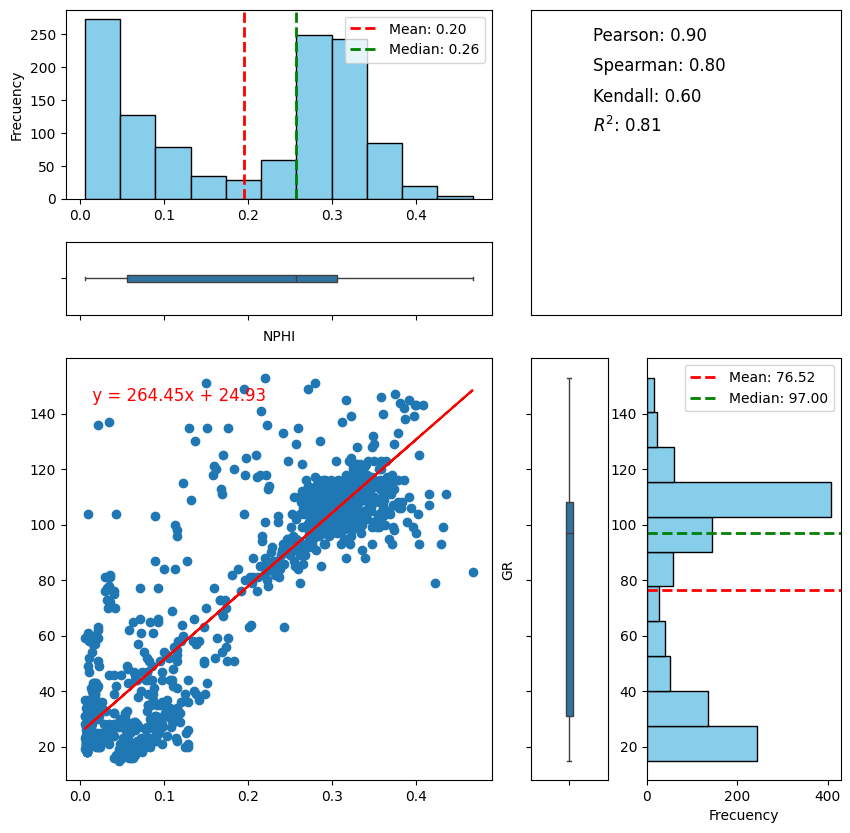

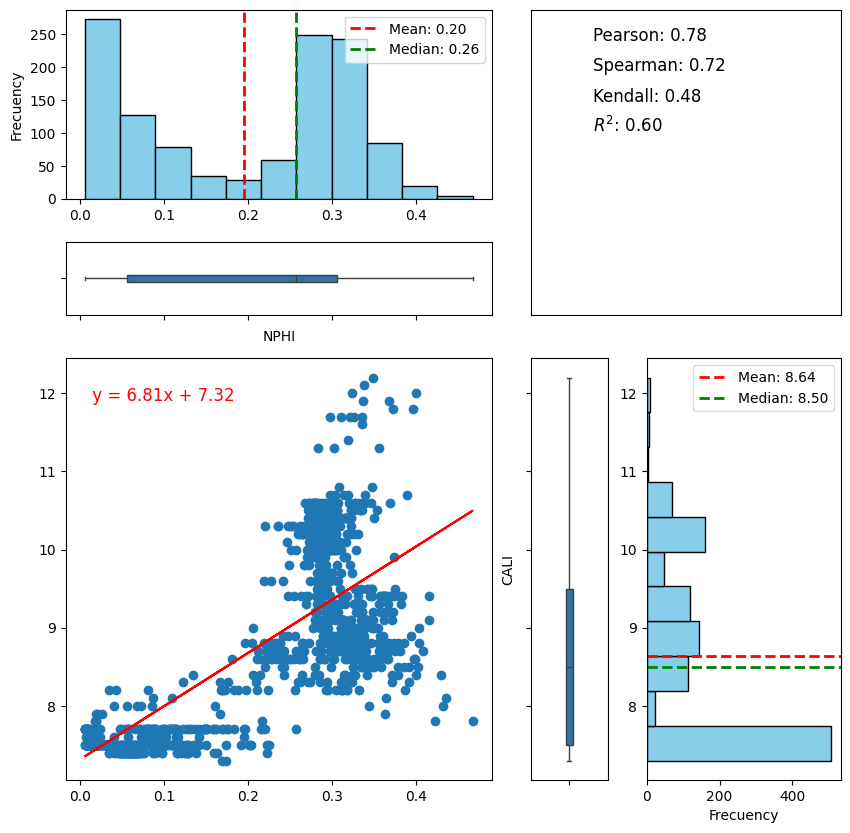

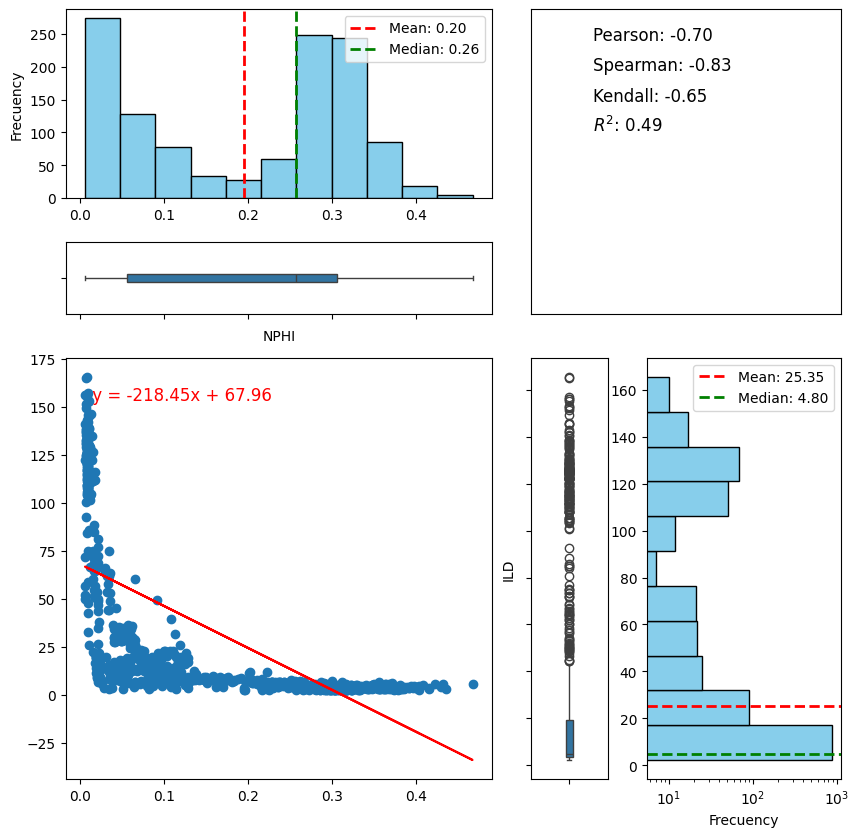

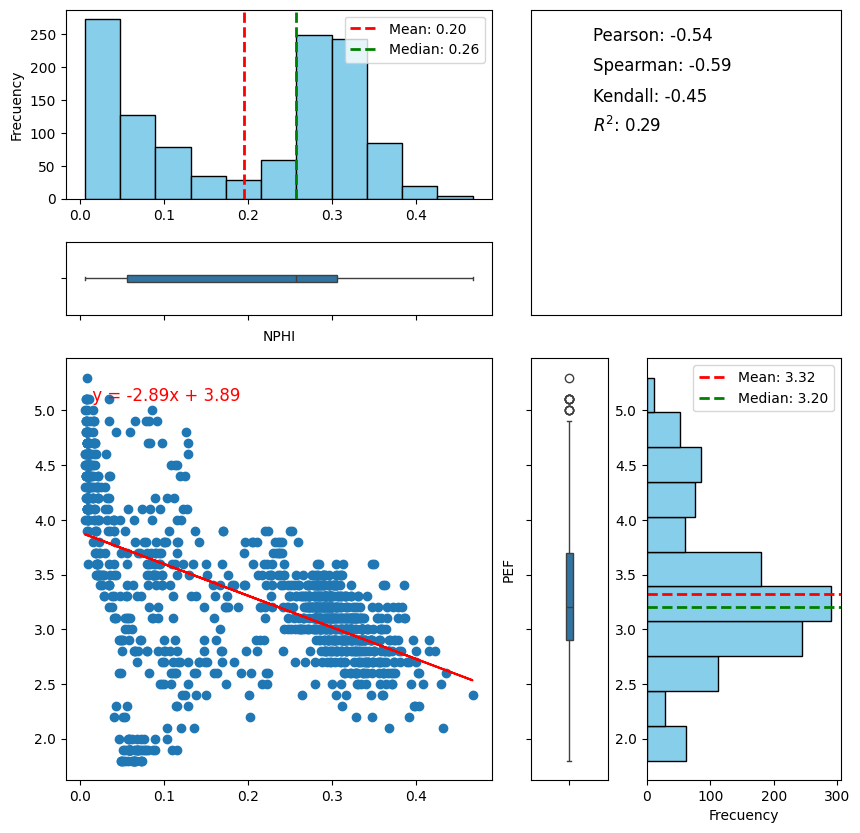

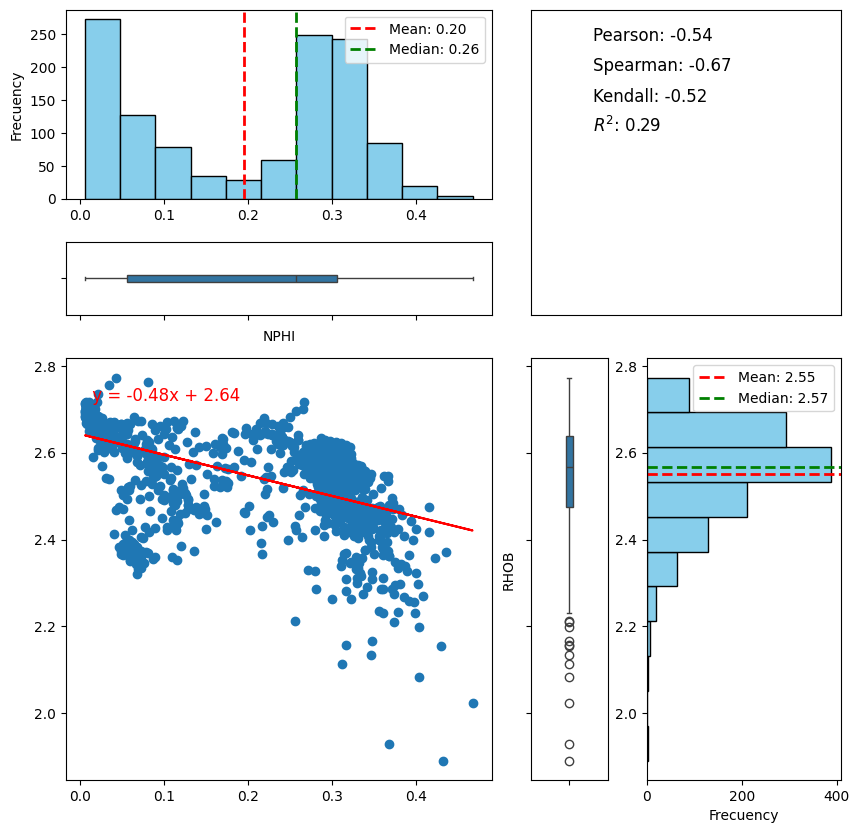

In [ ]:
plotxy(data.NPHI, data.GR, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/NPHI_GR_bivariado.png', dpi=600)
plt.show()
plotxy(data.NPHI, data.CALI, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/NPHI_CALI_bivariado.png', dpi=600)
plt.show()
plotxy(data.NPHI, data.ILD, log_x=False, log_y=True)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/NPHI_ILD_bivariado.png', dpi=600)
plt.show()
plotxy(data.NPHI, data.PEF, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/NPHI_PEF_bivariado.png', dpi=600)
plt.show()
plotxy(data.NPHI, data.RHOB, log_x=False, log_y=False)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Ciencia_datos_2024/Bivariado/NPHI_RHOB_bivariado.png', dpi=600)
plt.show()